## Descriptive and Predictive Analytics - Group Project
#### *Advanced analytics in fundraising: How knowing donors helps growing donors*
####  AZUBUIKE Olive Chimazuru

Libraries

In [1]:
# Import libraries
import numpy as np               # Arrary
import pandas as pd              # DataFrame
from pandas               import get_dummies
import matplotlib.pyplot as plt  # Plotting
from datetime import datetime
# Turn off some annoying warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## DATA INSPECTION

PATH

In [2]:
Data=r'C:\Users\Source\Documents\IESEG\1 Semester\Clases\Descriptive and predictive\Group project\GROUP ASSIGNMENT DSC use-case-20241207\Data'

IMPORTING DATA

In [3]:
donors=pd.read_csv(Data + r"\donors.csv", sep=',')
gifts =pd.read_csv(Data + r"\gifts.csv", sep=',')
campaigns=pd.read_csv(Data + r"\campaigns.csv", sep=';')
selection_campaign_6169=pd.read_csv(Data + r"\selection campaign 6169.csv", sep=';')
selection_campaign_7244=pd.read_csv(Data + r"\selection campaign 7244.csv", sep=',')

EXPLORING THE TABLES

In [4]:
print(donors.shape)
print(donors.head())
print(donors.info(), "\n")

print(gifts.shape)
print(gifts.head())
print(gifts.info(), "\n")

print(campaigns.shape)
print(campaigns.head())
print(campaigns.info(), "\n")

print(selection_campaign_6169.shape)
print(selection_campaign_6169.head())
print(selection_campaign_6169.info(), "\n")

print(selection_campaign_7244.shape)
print(selection_campaign_7244.head())
print(selection_campaign_7244.info(), "\n")

(44691, 7)
   donorID  zipcode         province    region gender language dateOfBirth
0  D100001   1861.0  Flemish Brabant  Flanders      F       NL  12/24/1967
1  D100002   2260.0          Antwerp  Flanders      M       NL  01/14/1952
2  D100003   1780.0  Flemish Brabant  Flanders      M       NL  12/23/1986
3  D100004   1020.0         Brussels  Brussels      F       FR  03/29/1952
4  D100005   1020.0         Brussels  Brussels      F       FR  06/25/1986
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      44691 non-null  object 
 1   zipcode      44689 non-null  float64
 2   province     44691 non-null  object 
 3   region       44691 non-null  object 
 4   gender       44659 non-null  object 
 5   language     44691 non-null  object 
 6   dateOfBirth  44691 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.4+ MB
N

#### Use the information of the campaign 6169 as train data and the information of the campaign 7244 as test data.

In [5]:
#Creating the training set
training_set=donors[donors['donorID'].isin(selection_campaign_6169['donorID'])]
training_set.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
3,D100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
7,D100008,1780.0,Flemish Brabant,Flanders,M,FR,08/30/1937
8,D100009,1020.0,Brussels,Brussels,M,FR,01/20/1932


In [6]:
#Exploring the training set
print(training_set.shape)
print(training_set.head())
print(training_set.info(), "\n")

(34874, 7)
   donorID  zipcode         province    region gender language dateOfBirth
0  D100001   1861.0  Flemish Brabant  Flanders      F       NL  12/24/1967
1  D100002   2260.0          Antwerp  Flanders      M       NL  01/14/1952
3  D100004   1020.0         Brussels  Brussels      F       FR  03/29/1952
7  D100008   1780.0  Flemish Brabant  Flanders      M       FR  08/30/1937
8  D100009   1020.0         Brussels  Brussels      M       FR  01/20/1932
<class 'pandas.core.frame.DataFrame'>
Index: 34874 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      34874 non-null  object 
 1   zipcode      34872 non-null  float64
 2   province     34874 non-null  object 
 3   region       34874 non-null  object 
 4   gender       34854 non-null  object 
 5   language     34874 non-null  object 
 6   dateOfBirth  34874 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.1+ MB
None 


In [7]:
#Creating the test set
test_set=donors[donors['donorID'].isin(selection_campaign_7244['donorID'])]
test_set.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
7,D100008,1780.0,Flemish Brabant,Flanders,M,FR,08/30/1937
8,D100009,1020.0,Brussels,Brussels,M,FR,01/20/1932
9,D100010,1020.0,Brussels,Brussels,M,FR,05/30/1983


In [8]:
#Exploring the test set
print(test_set.shape)
print(test_set.head())
print(test_set.info(), "\n")

(25645, 7)
   donorID  zipcode         province    region gender language dateOfBirth
0  D100001   1861.0  Flemish Brabant  Flanders      F       NL  12/24/1967
1  D100002   2260.0          Antwerp  Flanders      M       NL  01/14/1952
7  D100008   1780.0  Flemish Brabant  Flanders      M       FR  08/30/1937
8  D100009   1020.0         Brussels  Brussels      M       FR  01/20/1932
9  D100010   1020.0         Brussels  Brussels      M       FR  05/30/1983
<class 'pandas.core.frame.DataFrame'>
Index: 25645 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      25645 non-null  object 
 1   zipcode      25644 non-null  float64
 2   province     25645 non-null  object 
 3   region       25645 non-null  object 
 4   gender       25634 non-null  object 
 5   language     25645 non-null  object 
 6   dateOfBirth  25645 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.6+ MB
None 


DEFINING TODAY's DATE

In [9]:
# Define the 'today' date for TRAINING
today_train = datetime.strptime('08/04/2018', '%m/%d/%Y')
#Define the date three years ago from 'today' for TRAINING
Y3_train = datetime.strptime('08/04/2015', '%m/%d/%Y')

# Define the "today" date for TEST
today_test= datetime.strptime('05/18/2019', '%m/%d/%Y')
#Define the date three years ago from 'today' for TEST
Y3_test = datetime.strptime('05/18/2016', '%m/%d/%Y')

## PREPOCESSING THE DATA

GIFTS TABLE

Analysing if there are any missing value, and substituting them with either the 'mode' if character of 'mean' if numeric or filling with zeros.

In [10]:
## Investigating the number of missing values 
print(gifts.isnull().sum())

donorID           0
campaignID    15637
amount            0
date              0
dtype: int64


In [11]:
# Replace NaN values in the campaignID column with 0
gifts['campaignID'] = gifts['campaignID'].fillna(0)

# Check the updated DataFrame
gifts.head()

,donorID,campaignID,amount,date
0,D100001,0.0,"12,39",23/03/2004
1,D100001,1577.0,"12,39",11/10/2007
2,D100001,1634.0,"6,69",28/12/2007
3,D100001,1778.0,"24,79",14/06/2008
4,D100001,1808.0,"7,44",09/07/2008


In [12]:
# Checking the missing values again
print(gifts.isnull().sum())

donorID       0
campaignID    0
amount        0
date          0
dtype: int64


In [13]:
#Analyzing the variables' type
gifts.dtypes

donorID        object
campaignID    float64
amount         object
date           object
dtype: object

In [14]:
# Changing the data types
#Step 1: Remove thousands separators
gifts['amount'] = gifts['amount'].str.replace(r'\.', '', regex=True)

# Step 2: Replace commas with dots for decimal conversion
gifts['amount'] = gifts['amount'].str.replace(',', '.', regex=True)

# Step 3: Remove non-numeric characters
gifts['amount'] = gifts['amount'].str.replace(r'[^0-9.]', '', regex=True)

# Step 4: Convert to numeric, handling errors
gifts['amount'] = pd.to_numeric(gifts['amount'], errors='coerce')

# Step 5: Fill or handle NaN values (optional)
# Example: Replace NaN with 0
gifts['amount'].fillna(0, inplace=True)

# Step 6: Convert 'date' to a datetime data type
gifts['date'] = pd.to_datetime(gifts['date'])

# Verify the result
print(gifts['amount'].head())
print(gifts.info())

0    12.39
1    12.39
2     6.69
3    24.79
4     7.44
Name: amount, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   donorID     216594 non-null  object        
 1   campaignID  216594 non-null  float64       
 2   amount      216594 non-null  float64       
 3   date        216594 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 6.6+ MB
None


TRAINING SET TABLE

In [15]:
## Investigating the number of missing values 
print(training_set.isnull().sum())

donorID         0
zipcode         2
province        0
region          0
gender         20
language        0
dateOfBirth     0
dtype: int64


In [16]:
training_set.dtypes

donorID         object
zipcode        float64
province        object
region          object
gender          object
language        object
dateOfBirth     object
dtype: object

In [17]:
#Need to change the type of "date" to date_type
training_set['dateOfBirth']=pd.to_datetime(training_set['dateOfBirth'])
print(training_set.dtypes)

donorID                object
zipcode               float64
province               object
region                 object
gender                 object
language               object
dateOfBirth    datetime64[ns]
dtype: object


Handling missing variables 

In [18]:
#Computing the gender mode per province in the donors
modeGender = training_set.groupby('province')['gender'].apply(lambda x: x.mode()[0]).reset_index()

#Rename the column to make it more clear
modeGender = modeGender.rename(columns={'gender':'gender_mode'})
modeGender

,province,gender_mode
0,ANTWERP,M
1,Antwerp,M
2,Brussels,M
3,East Flanders,M
4,Flemish Brabant,M
5,Hainaut,M
6,Liege,M
7,Limburg,M
8,Luxembourg,M
9,Missing,F


In [19]:
#Merge the modeGender per province with the original dataset 'donors'
training_set=pd.merge(training_set,modeGender,on='province',how='left')

#Fill missing values in 'gender' with the mode for each province
training_set['gender']=training_set['gender'].fillna(training_set['gender_mode'])

#Dropping the gender_mode
training_set=training_set.drop(columns=['gender_mode'])

In [20]:
#Looking again for the missing values
print(training_set.isnull().sum())

donorID        0
zipcode        2
province       0
region         0
gender         0
language       0
dateOfBirth    0
dtype: int64


Creating some additional variables for the donors

In [21]:
#Computing the age and age group for the donors
# Ensure the dateOfBirth column is in datetime format
training_set['dateOfBirth'] = pd.to_datetime(training_set['dateOfBirth'], format='%m/%d/%Y')

# Compute the age and age group based on the specified date
training_set['age'] = training_set['dateOfBirth'].apply(lambda dob: today_train.year - dob.year - ((today_train.month, today_train.day) < (dob.month, dob.day)))
training_set['age_group']=(training_set['age']//10)*10

#Drop Unnecessary columns
training_set=training_set.drop(columns=['dateOfBirth'])

# Display the donors table
training_set

,donorID,zipcode,province,region,gender,language,age,age_group
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,50,50
1,D100002,2260.0,Antwerp,Flanders,M,NL,66,60
2,D100004,1020.0,Brussels,Brussels,F,FR,66,60
3,D100008,1780.0,Flemish Brabant,Flanders,M,FR,80,80
4,D100009,1020.0,Brussels,Brussels,M,FR,86,80
...,...,...,...,...,...,...,...,...
34869,D144686,2440.0,Antwerp,Flanders,F,NL,53,50
34870,D144687,4900.0,Liege,Wallonia,M,FR,47,40
34871,D144689,3061.0,Flemish Brabant,Flanders,M,NL,51,50
34872,D144690,1950.0,Flemish Brabant,Flanders,M,FR,42,40


MERGE THE 'GIFTS' TABLE and 'DONORS' TABLE

In [22]:
#Compute the merge on donorID
merged_df=pd.merge(gifts,training_set,on='donorID')


#rename columns to avoid complications
merged_df = merged_df.rename(columns={'date':'dateOfDonation'})
merged_df

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,age_group
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,50
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,50
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,50
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,50
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,50
...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,50
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,50
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,50
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,40


Analyse it:

In [23]:
print(merged_df.isnull().sum())

donorID            0
campaignID         0
amount             0
dateOfDonation     0
zipcode           13
province           0
region             0
gender             0
language           0
age                0
age_group          0
dtype: int64


In [24]:
merged_df.dtypes

donorID                   object
campaignID               float64
amount                   float64
dateOfDonation    datetime64[ns]
zipcode                  float64
province                  object
region                    object
gender                    object
language                  object
age                        int64
age_group                  int64
dtype: object

CAMPAIGN TABLE

In [25]:
## Investigating the number of missing values 
print(campaigns.isnull().sum())

campaignID     0
date           0
lettersSent    0
CostUnit       0
dtype: int64


In [26]:
#Investigate the type of the variables
campaigns.dtypes

campaignID      int64
date           object
lettersSent    object
CostUnit       object
dtype: object

In [27]:
# Convert 'date' to datetime
campaigns['date'] = pd.to_datetime(campaigns['date'], format='%d/%m/%Y')

# Remove non-breaking spaces and other unwanted characters, then convert to integer
campaigns['lettersSent'] = campaigns['lettersSent'].str.replace(r'[^\d]', '', regex=True).astype(int)

# Clean 'CostUnit' to remove currency symbols and commas, then convert to float
campaigns['CostUnit'] = campaigns['CostUnit'].str.replace('€', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Verify the updated data types
print(campaigns.dtypes)

campaignID              int64
date           datetime64[ns]
lettersSent             int32
CostUnit              float64
dtype: object


In [28]:
# Compute the 'TotalCost'
campaigns['TotalCost'] = campaigns['lettersSent'] * campaigns['CostUnit']
#rename columns to avoid complications
campaigns = campaigns.rename(columns={'date':'dateOfCampaign'})
campaigns

,campaignID,dateOfCampaign,lettersSent,CostUnit,TotalCost
0,153,2004-12-13,6873,0.17,1168.41
1,154,2005-01-01,7656,0.30,2296.80
2,180,2005-01-18,9933,0.20,1986.60
3,433,2005-01-29,7448,0.59,4394.32
4,476,2005-02-12,6605,0.51,3368.55
...,...,...,...,...,...
362,7494,2019-10-17,8539,0.14,1195.46
363,7503,2019-10-29,6126,0.15,918.90
364,7505,2019-11-16,29746,0.12,3569.52
365,7519,2019-11-26,35199,0.36,12671.64


MERGING THE 'CAMPAIGNS' AND 'DONORS_GIFTS' TABLE

In [29]:
donors_gift_campaign=pd.merge(merged_df,campaigns,on='campaignID', how='left')

# Ensure 'dateOfDonation' column is in datetime format
donors_gift_campaign['dateOfDonation'] = pd.to_datetime(donors_gift_campaign['dateOfDonation'], errors='coerce')

donors_gift_campaign

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,age_group,dateOfCampaign,lettersSent,CostUnit,TotalCost
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,50,NaT,NaN,NaN,NaN
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,50,2007-10-09,34636.0,0.31,10737.16
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,50,2007-12-08,34080.0,0.21,7156.80
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,50,2008-05-25,30558.0,0.41,12528.78
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,50,2008-06-22,39664.0,0.61,24195.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,50,2018-06-08,39445.0,0.30,11833.50
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,50,2019-04-26,28592.0,0.06,1715.52
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,50,2019-11-26,35199.0,0.36,12671.64
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,40,2014-12-25,37833.0,0.50,18916.50


## FEATURES CONSTRUCTION FOR TRAINING SET

In [30]:
# Group by `donorID` 

donors_gift_campaign_Train1=donors_gift_campaign[donors_gift_campaign['dateOfDonation']<today_train]
donation_summary = donors_gift_campaign_Train1.groupby('donorID').agg(
    first_donation=('dateOfDonation', 'min'),  
    last_donation=('dateOfDonation', 'max'),
    tot_amount=('amount','sum'),
    avg_amount=('amount','mean'),
    campaign_count=('campaignID','count'),
    max_amount=('amount','max'),
    min_amount=('amount','min'),

).reset_index()


donors_gift_campaign = donors_gift_campaign.merge(donation_summary, on='donorID', how='left')

donors_gift_campaign

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,lettersSent,CostUnit,TotalCost,first_donation,last_donation,tot_amount,avg_amount,campaign_count,max_amount,min_amount
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,...,NaN,NaN,NaN,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,...,34636.0,0.31,10737.16,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,...,34080.0,0.21,7156.80,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,...,30558.0,0.41,12528.78,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,...,39664.0,0.61,24195.04,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,...,39445.0,0.30,11833.50,2005-07-22,2018-06-25,124.79,62.395000,2,100.0,24.79
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,...,28592.0,0.06,1715.52,2005-07-22,2018-06-25,124.79,62.395000,2,100.0,24.79
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,...,35199.0,0.36,12671.64,2005-07-22,2018-06-25,124.79,62.395000,2,100.0,24.79
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,...,37833.0,0.50,18916.50,2014-12-30,2014-12-30,40.00,40.000000,1,40.0,40.00


COMPUTING THE LOR

In [31]:
# Ensure the first_donation column is in datetime format
donors_gift_campaign['first_donation'] = pd.to_datetime(donors_gift_campaign['first_donation'], format='%m/%d/%Y')
# Calculate Length of Relationship (LOR) in years
donors_gift_campaign['LOR_days'] = (today_train - donors_gift_campaign['first_donation']).dt.days
donors_gift_campaign['LOR_years'] = (donors_gift_campaign['LOR_days'] / 365.25).round(1)  # Round to 1 decimal place
# Drop the LOR_days column if not needed
donors_gift_campaign.drop('LOR_days', axis=1, inplace=True)
# Display the updated dataset
donors_gift_campaign

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,CostUnit,TotalCost,first_donation,last_donation,tot_amount,avg_amount,campaign_count,max_amount,min_amount,LOR_years
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,...,NaN,NaN,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,...,0.31,10737.16,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,...,0.21,7156.80,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,...,0.41,12528.78,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,...,0.61,24195.04,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,...,0.30,11833.50,2005-07-22,2018-06-25,124.79,62.395000,2,100.0,24.79,13.0
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,...,0.06,1715.52,2005-07-22,2018-06-25,124.79,62.395000,2,100.0,24.79,13.0
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,...,0.36,12671.64,2005-07-22,2018-06-25,124.79,62.395000,2,100.0,24.79,13.0
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,...,0.50,18916.50,2014-12-30,2014-12-30,40.00,40.000000,1,40.0,40.00,3.6


RECENCY

In [32]:
# Ensure the first_donation column is in datetime format
donors_gift_campaign['last_donation'] = pd.to_datetime(donors_gift_campaign['last_donation'], format='%m/%d/%Y')

# Calculate Length of Relationship (LOR) in years
donors_gift_campaign['Recency_days'] = (today_train - donors_gift_campaign['last_donation']).dt.days
donors_gift_campaign['Recency_years'] = (donors_gift_campaign['Recency_days'] / 365.25).round(1)  # Round to 1 decimal place
# Drop the LOR_days column if not needed
donors_gift_campaign.drop('Recency_days', axis=1, inplace=True)
# Display the updated dataset
donors_gift_campaign

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,TotalCost,first_donation,last_donation,tot_amount,avg_amount,campaign_count,max_amount,min_amount,LOR_years,Recency_years
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,...,NaN,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4,6.6
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,...,10737.16,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4,6.6
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,...,7156.80,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4,6.6
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,...,12528.78,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4,6.6
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,...,24195.04,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,14.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,...,11833.50,2005-07-22,2018-06-25,124.79,62.395000,2,100.0,24.79,13.0,0.1
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,...,1715.52,2005-07-22,2018-06-25,124.79,62.395000,2,100.0,24.79,13.0,0.1
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,...,12671.64,2005-07-22,2018-06-25,124.79,62.395000,2,100.0,24.79,13.0,0.1
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,...,18916.50,2014-12-30,2014-12-30,40.00,40.000000,1,40.0,40.00,3.6,3.6


FREQUENCY

In [33]:
donors_gift_campaign['Frequency']=donors_gift_campaign['campaign_count']
#donors_gift_campaign = donors_gift_campaign.drop(columns=['campaign_count'])
##Monetary Value
donors_gift_campaign['Monetary_Value']=donors_gift_campaign['tot_amount']
donors_gift_campaign = donors_gift_campaign.drop(columns=['tot_amount'])
donors_gift_campaign

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,first_donation,last_donation,avg_amount,campaign_count,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2004-03-23,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2004-03-23,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2004-03-23,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2004-03-23,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2004-03-23,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,...,2005-07-22,2018-06-25,62.395000,2,100.0,24.79,13.0,0.1,2,124.79
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,...,2005-07-22,2018-06-25,62.395000,2,100.0,24.79,13.0,0.1,2,124.79
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,...,2005-07-22,2018-06-25,62.395000,2,100.0,24.79,13.0,0.1,2,124.79
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,...,2014-12-30,2014-12-30,40.000000,1,40.0,40.00,3.6,3.6,1,40.00


AVERAGE DONATION PER YEAR

We want to know based on the LOR_years how many donation does a customer make

In [34]:
donors_gift_campaign['avg_donation_per_year']=(donors_gift_campaign["Frequency"]/donors_gift_campaign['LOR_years']).round(2)
donors_gift_campaign

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,last_donation,avg_amount,campaign_count,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value,avg_donation_per_year
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,...,2011-12-30,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,...,2018-06-25,62.395000,2,100.0,24.79,13.0,0.1,2,124.79,0.15
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,...,2018-06-25,62.395000,2,100.0,24.79,13.0,0.1,2,124.79,0.15
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,...,2018-06-25,62.395000,2,100.0,24.79,13.0,0.1,2,124.79,0.15
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,...,2014-12-30,40.000000,1,40.0,40.00,3.6,3.6,1,40.00,0.28


DONOR LIFETIME

In [35]:

donors_gift_campaign['Donor_lifetime_days'] = (donors_gift_campaign['last_donation']-donors_gift_campaign['first_donation']).dt.days
donors_gift_campaign['Donor_lifetime_years'] = (donors_gift_campaign['Donor_lifetime_days'] / 365.25).round(1)
donors_gift_campaign = donors_gift_campaign.drop(columns=['Donor_lifetime_days'])

donors_gift_campaign = donors_gift_campaign.drop(columns=['first_donation','last_donation'])
donors_gift_campaign

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,avg_amount,campaign_count,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value,avg_donation_per_year,Donor_lifetime_years
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,...,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,...,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,...,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,...,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,...,14.874167,12,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,...,62.395000,2,100.0,24.79,13.0,0.1,2,124.79,0.15,12.9
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,...,62.395000,2,100.0,24.79,13.0,0.1,2,124.79,0.15,12.9
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,...,62.395000,2,100.0,24.79,13.0,0.1,2,124.79,0.15,12.9
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,...,40.000000,1,40.0,40.00,3.6,3.6,1,40.00,0.28,0.0


AVERAGE TIME BETWEEN DONATIONS

In [36]:
donors_gift_campaign = donors_gift_campaign.sort_values(by=['donorID', 'dateOfDonation'])


donors_gift_campaign['time_diff_months'] = donors_gift_campaign.groupby('donorID')['dateOfDonation'].diff().dt.days / 30.0

avg_time_between_donations = donors_gift_campaign.groupby('donorID')['time_diff_months'].mean().reset_index()
avg_time_between_donations.rename(columns={'time_diff_months': 'avg_time_between_donations'}, inplace=True)

donors_gift_campaign = donors_gift_campaign.merge(avg_time_between_donations, on='donorID', how='left')

donors_gift_campaign


,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value,avg_donation_per_year,Donor_lifetime_years,time_diff_months,avg_time_between_donations
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,...,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8,NaN,8.600000
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,...,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8,43.233333,8.600000
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,...,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8,2.600000,8.600000
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,...,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8,5.633333,8.600000
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,...,30.0,6.69,14.4,6.6,12,178.49,0.83,7.8,0.833333,8.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,...,100.0,24.79,13.0,0.1,2,124.79,0.15,12.9,157.366667,58.333333
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,...,100.0,24.79,13.0,0.1,2,124.79,0.15,12.9,10.333333,58.333333
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,...,100.0,24.79,13.0,0.1,2,124.79,0.15,12.9,7.300000,58.333333
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,...,40.0,40.00,3.6,3.6,1,40.00,0.28,0.0,NaN,NaN


OVERALL AVERAGE TIME BETWEEN DONATIONS

In [37]:
gifts = gifts.sort_values(by=['donorID', 'date'])
gifts['time_diff'] = gifts.groupby('donorID')['date'].diff().dt.days

average_time_per_donor = gifts.groupby('donorID')['time_diff'].mean()

overall_average_time = average_time_per_donor.mean()

print(f"The overall average time between donations is {overall_average_time:.2f} days.")

The overall average time between donations is 466.50 days.


In [38]:
from datetime import datetime, timedelta

VARIABLE FOR THE LAST N YEARS

In [39]:
n= 1
date_limit = today_train - timedelta(days=365 * n)

donors_gift_campaign_Train2 = donors_gift_campaign[
    (donors_gift_campaign['dateOfDonation'] >= date_limit) &
    (donors_gift_campaign['dateOfDonation'] <= today_train)
]



donation_summaryn = donors_gift_campaign_Train2.groupby('donorID').agg(
    tot_amount_n=('amount','sum'),
    avg_amount_n=('amount','mean'),
    campaign_count_n=('campaignID','count'),
    max_amount_n=('amount','max'),
    min_amount_n=('amount','min'),

).reset_index()


donors_gift_campaign = donors_gift_campaign.merge(donation_summaryn, on='donorID', how='left')

donors_gift_campaign

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,Monetary_Value,avg_donation_per_year,Donor_lifetime_years,time_diff_months,avg_time_between_donations,tot_amount_n,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,...,178.49,0.83,7.8,NaN,8.600000,NaN,NaN,NaN,NaN,NaN
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,...,178.49,0.83,7.8,43.233333,8.600000,NaN,NaN,NaN,NaN,NaN
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,...,178.49,0.83,7.8,2.600000,8.600000,NaN,NaN,NaN,NaN,NaN
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,...,178.49,0.83,7.8,5.633333,8.600000,NaN,NaN,NaN,NaN,NaN
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,...,178.49,0.83,7.8,0.833333,8.600000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,...,124.79,0.15,12.9,157.366667,58.333333,100.0,100.0,1.0,100.0,100.0
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,...,124.79,0.15,12.9,10.333333,58.333333,100.0,100.0,1.0,100.0,100.0
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,...,124.79,0.15,12.9,7.300000,58.333333,100.0,100.0,1.0,100.0,100.0
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,...,40.00,0.28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MOST FREQUENT MONTH

In [40]:
donors_gift_campaign['month'] = donors_gift_campaign['dateOfDonation'].dt.month


# Group by donor and month to calculate total donations per month
donations_per_month = donors_gift_campaign.groupby(['donorID', 'month'])['amount'].sum().reset_index()

# Find the month with the highest donations for each donor
most_frequent_month = donations_per_month.loc[donations_per_month.groupby('donorID')['amount'].idxmax()]

# Rename columns for clarity
most_frequent_month = most_frequent_month.rename(columns={'amount': 'total_donated', 'month': 'most_frequent_month'})

# Merge the most frequent month back to the original DataFrame
donors_gift_campaign = pd.merge(donors_gift_campaign, most_frequent_month[['donorID', 'most_frequent_month']], on='donorID', how='left')
donors_gift_campaign

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,Donor_lifetime_years,time_diff_months,avg_time_between_donations,tot_amount_n,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n,month,most_frequent_month
0,D100001,0.0,12.39,2004-03-23,1861.0,Flemish Brabant,Flanders,F,NL,50,...,7.8,NaN,8.600000,NaN,NaN,NaN,NaN,NaN,3,12
1,D100001,1577.0,12.39,2007-10-11,1861.0,Flemish Brabant,Flanders,F,NL,50,...,7.8,43.233333,8.600000,NaN,NaN,NaN,NaN,NaN,10,12
2,D100001,1634.0,6.69,2007-12-28,1861.0,Flemish Brabant,Flanders,F,NL,50,...,7.8,2.600000,8.600000,NaN,NaN,NaN,NaN,NaN,12,12
3,D100001,1778.0,24.79,2008-06-14,1861.0,Flemish Brabant,Flanders,F,NL,50,...,7.8,5.633333,8.600000,NaN,NaN,NaN,NaN,NaN,6,12
4,D100001,1808.0,7.44,2008-07-09,1861.0,Flemish Brabant,Flanders,F,NL,50,...,7.8,0.833333,8.600000,NaN,NaN,NaN,NaN,NaN,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151728,D144689,5326.0,100.00,2018-06-25,3061.0,Flemish Brabant,Flanders,M,NL,51,...,12.9,157.366667,58.333333,100.0,100.0,1.0,100.0,100.0,6,12
151729,D144689,7212.0,100.00,2019-05-01,3061.0,Flemish Brabant,Flanders,M,NL,51,...,12.9,10.333333,58.333333,100.0,100.0,1.0,100.0,100.0,5,12
151730,D144689,7519.0,200.00,2019-12-06,3061.0,Flemish Brabant,Flanders,M,NL,51,...,12.9,7.300000,58.333333,100.0,100.0,1.0,100.0,100.0,12,12
151731,D144690,3941.0,40.00,2014-12-30,1950.0,Flemish Brabant,Flanders,M,FR,42,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12


Our Training Set

In [41]:
training_set=donors_gift_campaign[donors_gift_campaign['dateOfDonation']<today_train]

In [42]:
print(training_set.isnull().sum())

donorID                            0
campaignID                         0
amount                             0
dateOfDonation                     0
zipcode                           12
province                           0
region                             0
gender                             0
language                           0
age                                0
age_group                          0
dateOfCampaign                 10917
lettersSent                    10917
CostUnit                       10917
TotalCost                      10917
avg_amount                         0
campaign_count                     0
max_amount                         0
min_amount                         0
LOR_years                          0
Recency_years                      0
Frequency                          0
Monetary_Value                     0
avg_donation_per_year              0
Donor_lifetime_years               0
time_diff_months               34869
avg_time_between_donations     14607
t

In [43]:
training_set.fillna(0, inplace=True)

In [44]:
print(training_set.isnull().sum())

donorID                       0
campaignID                    0
amount                        0
dateOfDonation                0
zipcode                       0
province                      0
region                        0
gender                        0
language                      0
age                           0
age_group                     0
dateOfCampaign                0
lettersSent                   0
CostUnit                      0
TotalCost                     0
avg_amount                    0
campaign_count                0
max_amount                    0
min_amount                    0
LOR_years                     0
Recency_years                 0
Frequency                     0
Monetary_Value                0
avg_donation_per_year         0
Donor_lifetime_years          0
time_diff_months              0
avg_time_between_donations    0
tot_amount_n                  0
avg_amount_n                  0
campaign_count_n              0
max_amount_n                  0
min_amou

Group by 'donorID'

In [45]:
training_set=training_set.groupby(['donorID','zipcode','province','region','gender','age','age_group','language','Donor_lifetime_years', 'avg_amount','max_amount',
'min_amount','LOR_years','Recency_years','Frequency','Monetary_Value','avg_donation_per_year', 'tot_amount_n',	'avg_amount_n',	'campaign_count_n',	'max_amount_n'	,'min_amount_n', 'most_frequent_month']).agg(
    tot_amount_3y=('amount','sum'),
    avg_amount_3y=('amount','mean'),
    campaign_count_3y=('campaignID','count'),
    lettersSent=('lettersSent','mean'),
    CostUnit=('CostUnit','mean')
).reset_index()

training_set

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n,most_frequent_month,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit
0,D100001,1861.0,Flemish Brabant,Flanders,F,50,50,NL,7.8,14.874167,...,0.0,0.0,0.0,0.0,12,178.49,14.874167,12,30137.666667,0.307500
1,D100002,2260.0,Antwerp,Flanders,M,66,60,NL,0.0,20.000000,...,0.0,0.0,0.0,0.0,1,20.00,20.000000,1,37833.000000,0.500000
2,D100004,1020.0,Brussels,Brussels,F,66,60,FR,5.9,27.546923,...,0.0,0.0,0.0,0.0,12,716.22,27.546923,26,32142.538462,0.293462
3,D100008,1780.0,Flemish Brabant,Flanders,M,80,80,FR,4.4,41.456667,...,0.0,0.0,0.0,0.0,10,124.37,41.456667,3,30994.000000,0.440000
4,D100009,1020.0,Brussels,Brussels,M,86,80,FR,6.2,17.198947,...,0.0,0.0,0.0,0.0,4,326.78,17.198947,19,34788.105263,0.433158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,Antwerp,Flanders,F,53,50,NL,0.0,50.000000,...,0.0,0.0,0.0,0.0,4,50.00,50.000000,1,18803.000000,0.320000
34865,D144687,4900.0,Liege,Wallonia,M,47,40,FR,0.0,10.000000,...,0.0,0.0,0.0,0.0,11,10.00,10.000000,1,24753.000000,0.200000
34866,D144689,3061.0,Flemish Brabant,Flanders,M,51,50,NL,12.9,62.395000,...,100.0,1.0,100.0,100.0,12,124.79,62.395000,2,32197.500000,0.220000
34867,D144690,1950.0,Flemish Brabant,Flanders,M,42,40,FR,0.0,40.000000,...,0.0,0.0,0.0,0.0,12,40.00,40.000000,1,37833.000000,0.500000


Now we are going to create our target set, which are donors who have donated €1 or more based on TOT_AMOUNT after one month

In [46]:
# Add dummy encoding column: 1 if tot_amount >= 30, otherwise 0

target_set = donors_gift_campaign[donors_gift_campaign['dateOfDonation'] >= '2018-09-04']
target_set = target_set[target_set['dateOfDonation'] < '2018-12-04']
#target_set=target_set[target_set['campaignID']!=0]
target_set= target_set[target_set['campaignID']==6169]
target_set

,donorID,campaignID,amount,dateOfDonation,zipcode,province,region,gender,language,age,...,Donor_lifetime_years,time_diff_months,avg_time_between_donations,tot_amount_n,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n,month,most_frequent_month
87,D100023,6169.0,15.0,2018-09-15,1150.0,Brussels,Brussels,M,FR,63,...,0.0,35.366667,15.755556,NaN,NaN,NaN,NaN,NaN,9,9
542,D100126,6169.0,123.0,2018-09-11,1150.0,Brussels,Brussels,M,NL,30,...,0.0,35.066667,23.400000,NaN,NaN,NaN,NaN,NaN,9,9
797,D100253,6169.0,120.0,2018-09-18,1500.0,Flemish Brabant,Flanders,M,NL,60,...,7.1,46.600000,7.847059,NaN,NaN,NaN,NaN,NaN,9,9
949,D100279,6169.0,75.0,2018-09-13,1601.0,Flemish Brabant,Flanders,M,NL,43,...,9.0,44.333333,10.693333,NaN,NaN,NaN,NaN,NaN,9,1
1303,D100320,6169.0,135.0,2018-09-09,1730.0,Flemish Brabant,Flanders,F,NL,38,...,9.1,51.233333,9.513725,NaN,NaN,NaN,NaN,NaN,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151500,D144618,6169.0,60.0,2018-09-22,8400.0,West Flanders,Flanders,F,NL,32,...,0.0,144.066667,79.400000,NaN,NaN,NaN,NaN,NaN,9,9
151510,D144621,6169.0,30.0,2018-09-22,1703.0,Flemish Brabant,Flanders,M,NL,57,...,0.0,48.766667,48.766667,NaN,NaN,NaN,NaN,NaN,9,9
151512,D144622,6169.0,120.0,2018-09-16,8800.0,West Flanders,Flanders,F,NL,79,...,0.0,154.266667,154.266667,NaN,NaN,NaN,NaN,NaN,9,9
151516,D144623,6169.0,15.0,2018-09-22,8310.0,West Flanders,Flanders,M,NL,46,...,2.2,111.200000,29.066667,NaN,NaN,NaN,NaN,NaN,9,11


In [47]:
#Grouping
target_set=target_set.groupby(['donorID','zipcode','province','region','gender','age','age_group','language']).agg(
    tot_amount=('amount','sum'),
    avg_amount=('amount','mean'),
    campaign_count=('campaignID','count')
).reset_index()

target_set

,donorID,zipcode,province,region,gender,age,age_group,language,tot_amount,avg_amount,campaign_count
0,D100023,1150.0,Brussels,Brussels,M,63,60,FR,15.0,15.0,1
1,D100126,1150.0,Brussels,Brussels,M,30,30,NL,123.0,123.0,1
2,D100253,1500.0,Flemish Brabant,Flanders,M,60,60,NL,120.0,120.0,1
3,D100279,1601.0,Flemish Brabant,Flanders,M,43,40,NL,75.0,75.0,1
4,D100320,1730.0,Flemish Brabant,Flanders,F,38,30,NL,135.0,135.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1171,D144618,8400.0,West Flanders,Flanders,F,32,30,NL,60.0,60.0,1
1172,D144621,1703.0,Flemish Brabant,Flanders,M,57,50,NL,30.0,30.0,1
1173,D144622,8800.0,West Flanders,Flanders,F,79,70,NL,120.0,120.0,1
1174,D144623,8310.0,West Flanders,Flanders,M,46,40,NL,15.0,15.0,1


In [48]:
target_set['tot_amount_dummy'] = (target_set['tot_amount'] >= 2).astype(int)
target_set
target_set = target_set[['donorID', 'tot_amount_dummy']]
target_set

,donorID,tot_amount_dummy
0,D100023,1
1,D100126,1
2,D100253,1
3,D100279,1
4,D100320,1
...,...,...
1171,D144618,1
1172,D144621,1
1173,D144622,1
1174,D144623,1


JOIN THE CREATED TARGET SET WITH THE TRAINING SET

In [49]:
training_set=pd.merge(training_set,target_set,on='donorID',how='left')
training_set

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,campaign_count_n,max_amount_n,min_amount_n,most_frequent_month,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,tot_amount_dummy
0,D100001,1861.0,Flemish Brabant,Flanders,F,50,50,NL,7.8,14.874167,...,0.0,0.0,0.0,12,178.49,14.874167,12,30137.666667,0.307500,NaN
1,D100002,2260.0,Antwerp,Flanders,M,66,60,NL,0.0,20.000000,...,0.0,0.0,0.0,1,20.00,20.000000,1,37833.000000,0.500000,NaN
2,D100004,1020.0,Brussels,Brussels,F,66,60,FR,5.9,27.546923,...,0.0,0.0,0.0,12,716.22,27.546923,26,32142.538462,0.293462,NaN
3,D100008,1780.0,Flemish Brabant,Flanders,M,80,80,FR,4.4,41.456667,...,0.0,0.0,0.0,10,124.37,41.456667,3,30994.000000,0.440000,NaN
4,D100009,1020.0,Brussels,Brussels,M,86,80,FR,6.2,17.198947,...,0.0,0.0,0.0,4,326.78,17.198947,19,34788.105263,0.433158,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,Antwerp,Flanders,F,53,50,NL,0.0,50.000000,...,0.0,0.0,0.0,4,50.00,50.000000,1,18803.000000,0.320000,NaN
34865,D144687,4900.0,Liege,Wallonia,M,47,40,FR,0.0,10.000000,...,0.0,0.0,0.0,11,10.00,10.000000,1,24753.000000,0.200000,NaN
34866,D144689,3061.0,Flemish Brabant,Flanders,M,51,50,NL,12.9,62.395000,...,1.0,100.0,100.0,12,124.79,62.395000,2,32197.500000,0.220000,NaN
34867,D144690,1950.0,Flemish Brabant,Flanders,M,42,40,FR,0.0,40.000000,...,0.0,0.0,0.0,12,40.00,40.000000,1,37833.000000,0.500000,NaN


Calculate the ratio of the dummies

In [50]:
training_set[['donorID','tot_amount_dummy']].groupby(['tot_amount_dummy'],dropna=False).count()

,donorID
tot_amount_dummy,
0.0,1
1.0,1175
NaN,33693


In [51]:
#Replace the 'NaN' within the 'tot_amount_dummy' with 0, since they are not present into the target_set and hence not made a donation
training_set['tot_amount_dummy'] = training_set['tot_amount_dummy'].fillna(0).astype(int)
training_set

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,campaign_count_n,max_amount_n,min_amount_n,most_frequent_month,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,tot_amount_dummy
0,D100001,1861.0,Flemish Brabant,Flanders,F,50,50,NL,7.8,14.874167,...,0.0,0.0,0.0,12,178.49,14.874167,12,30137.666667,0.307500,0
1,D100002,2260.0,Antwerp,Flanders,M,66,60,NL,0.0,20.000000,...,0.0,0.0,0.0,1,20.00,20.000000,1,37833.000000,0.500000,0
2,D100004,1020.0,Brussels,Brussels,F,66,60,FR,5.9,27.546923,...,0.0,0.0,0.0,12,716.22,27.546923,26,32142.538462,0.293462,0
3,D100008,1780.0,Flemish Brabant,Flanders,M,80,80,FR,4.4,41.456667,...,0.0,0.0,0.0,10,124.37,41.456667,3,30994.000000,0.440000,0
4,D100009,1020.0,Brussels,Brussels,M,86,80,FR,6.2,17.198947,...,0.0,0.0,0.0,4,326.78,17.198947,19,34788.105263,0.433158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,Antwerp,Flanders,F,53,50,NL,0.0,50.000000,...,0.0,0.0,0.0,4,50.00,50.000000,1,18803.000000,0.320000,0
34865,D144687,4900.0,Liege,Wallonia,M,47,40,FR,0.0,10.000000,...,0.0,0.0,0.0,11,10.00,10.000000,1,24753.000000,0.200000,0
34866,D144689,3061.0,Flemish Brabant,Flanders,M,51,50,NL,12.9,62.395000,...,1.0,100.0,100.0,12,124.79,62.395000,2,32197.500000,0.220000,0
34867,D144690,1950.0,Flemish Brabant,Flanders,M,42,40,FR,0.0,40.000000,...,0.0,0.0,0.0,12,40.00,40.000000,1,37833.000000,0.500000,0


Recalculate the ratio of the dummies

In [52]:
training_set[['donorID','tot_amount_dummy']].groupby(['tot_amount_dummy']).count()

,donorID
tot_amount_dummy,
0,33694
1,1175


In [53]:
print(training_set.isnull().sum())

donorID                  0
zipcode                  0
province                 0
region                   0
gender                   0
age                      0
age_group                0
language                 0
Donor_lifetime_years     0
avg_amount               0
max_amount               0
min_amount               0
LOR_years                0
Recency_years            0
Frequency                0
Monetary_Value           0
avg_donation_per_year    0
tot_amount_n             0
avg_amount_n             0
campaign_count_n         0
max_amount_n             0
min_amount_n             0
most_frequent_month      0
tot_amount_3y            0
avg_amount_3y            0
campaign_count_3y        0
lettersSent              0
CostUnit                 0
tot_amount_dummy         0
dtype: int64


We want to create other features, the following one will be on how rich the province is and hence how 'rich' is the donor based on the GDP_per_capita of each Province.

It's based on the created csv file concerning the GDP per Province of 2018.

In [54]:
gdp_pc_province_2018=pd.read_csv(Data + r"/GDP_per_province_2018.csv", sep=',')
gdp_pc_province_2018

,province,GDP,Population,GDP per Capita
0,Antwerp,88015000000,1847486.0,47640.0
1,Brussels,83987000000,1198726.0,70064.0
2,East Flanders,56415000000,1505053.0,37484.0
3,Flemish Brabant,49832000000,1138489.0,43770.0
4,Hainaut,34239000000,1341645.0,25520.0
5,Liege,31639000000,1105326.0,28624.0
6,Limburg,28707000000,870880.0,32963.0
7,Luxembourg,7056000000,283227.0,24913.0
8,Missing,41778730000,1034188.0,40398.0
9,Namur,13461000000,493073.0,27300.0


Analyse it:

In [55]:
gdp_pc_province_2018.dtypes

province           object
GDP                 int64
Population        float64
GDP per Capita    float64
dtype: object

In [56]:
gdp_pc_province_2018.describe()

,GDP,Population,GDP per Capita
count,1.200000e+01,1.200000e+01,12.000000
mean,4.177873e+10,1.034188e+06,38848.333333
std,2.534889e+10,4.601905e+05,12830.074869
min,7.056000e+09,2.832270e+05,24913.000000
25%,2.635500e+10,7.764282e+05,28293.000000
50%,3.800886e+10,1.121908e+06,38437.000000
75%,5.147775e+10,1.234456e+06,44737.500000
max,8.801500e+10,1.847486e+06,70064.000000


We want to categorize the amount of 'GDP per Capita'

In [57]:
# Define thresholds based on percentiles
low_threshold = gdp_pc_province_2018["GDP per Capita"].quantile(0.33)
high_threshold = gdp_pc_province_2018["GDP per Capita"].quantile(0.67)

# Categorize regions
def categorize_gdp_per_capita(gdp_per_capita):
    if gdp_per_capita < low_threshold:
        return "Low"
    elif gdp_per_capita < high_threshold:
        return "Medium"
    else:
        return "High"

# Apply categorization
gdp_pc_province_2018["Category"] = gdp_pc_province_2018["GDP per Capita"].apply(categorize_gdp_per_capita)

gdp_pc_province_2018

,province,GDP,Population,GDP per Capita,Category
0,Antwerp,88015000000,1847486.0,47640.0,High
1,Brussels,83987000000,1198726.0,70064.0,High
2,East Flanders,56415000000,1505053.0,37484.0,Medium
3,Flemish Brabant,49832000000,1138489.0,43770.0,High
4,Hainaut,34239000000,1341645.0,25520.0,Low
5,Liege,31639000000,1105326.0,28624.0,Low
6,Limburg,28707000000,870880.0,32963.0,Medium
7,Luxembourg,7056000000,283227.0,24913.0,Low
8,Missing,41778730000,1034188.0,40398.0,Medium
9,Namur,13461000000,493073.0,27300.0,Low


In [58]:
gdp_pc_province_2018.dtypes

province           object
GDP                 int64
Population        float64
GDP per Capita    float64
Category           object
dtype: object

In [59]:
training_set=pd.merge(training_set,gdp_pc_province_2018,on='province',how='left')
training_set

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,tot_amount_dummy,GDP,Population,GDP per Capita,Category
0,D100001,1861.0,Flemish Brabant,Flanders,F,50,50,NL,7.8,14.874167,...,178.49,14.874167,12,30137.666667,0.307500,0,4.983200e+10,1138489.0,43770.0,High
1,D100002,2260.0,Antwerp,Flanders,M,66,60,NL,0.0,20.000000,...,20.00,20.000000,1,37833.000000,0.500000,0,8.801500e+10,1847486.0,47640.0,High
2,D100004,1020.0,Brussels,Brussels,F,66,60,FR,5.9,27.546923,...,716.22,27.546923,26,32142.538462,0.293462,0,8.398700e+10,1198726.0,70064.0,High
3,D100008,1780.0,Flemish Brabant,Flanders,M,80,80,FR,4.4,41.456667,...,124.37,41.456667,3,30994.000000,0.440000,0,4.983200e+10,1138489.0,43770.0,High
4,D100009,1020.0,Brussels,Brussels,M,86,80,FR,6.2,17.198947,...,326.78,17.198947,19,34788.105263,0.433158,0,8.398700e+10,1198726.0,70064.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,Antwerp,Flanders,F,53,50,NL,0.0,50.000000,...,50.00,50.000000,1,18803.000000,0.320000,0,8.801500e+10,1847486.0,47640.0,High
34865,D144687,4900.0,Liege,Wallonia,M,47,40,FR,0.0,10.000000,...,10.00,10.000000,1,24753.000000,0.200000,0,3.163900e+10,1105326.0,28624.0,Low
34866,D144689,3061.0,Flemish Brabant,Flanders,M,51,50,NL,12.9,62.395000,...,124.79,62.395000,2,32197.500000,0.220000,0,4.983200e+10,1138489.0,43770.0,High
34867,D144690,1950.0,Flemish Brabant,Flanders,M,42,40,FR,0.0,40.000000,...,40.00,40.000000,1,37833.000000,0.500000,0,4.983200e+10,1138489.0,43770.0,High


## One Hot Encoding for the Features of the training set

Gender

In [60]:

training_set = training_set.join(get_dummies(training_set["gender"], prefix = "fl_gender_is", drop_first = True))

We want to have binairy values for each feature (1/0).
If your version of the get_dummies function returns a true/false outcome an extra transformation is needed.

In [61]:
training_set = training_set.replace(True, 1)
training_set = training_set.replace(False, 0)

training_set = training_set.drop(columns=['gender'])
training_set

,donorID,zipcode,province,region,age,age_group,language,Donor_lifetime_years,avg_amount,max_amount,...,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,tot_amount_dummy,GDP,Population,GDP per Capita,Category,fl_gender_is_M
0,D100001,1861.0,Flemish Brabant,Flanders,50,50,NL,7.8,14.874167,30.00,...,14.874167,12,30137.666667,0.307500,0,4.983200e+10,1138489.0,43770.0,High,0
1,D100002,2260.0,Antwerp,Flanders,66,60,NL,0.0,20.000000,20.00,...,20.000000,1,37833.000000,0.500000,0,8.801500e+10,1847486.0,47640.0,High,1
2,D100004,1020.0,Brussels,Brussels,66,60,FR,5.9,27.546923,49.58,...,27.546923,26,32142.538462,0.293462,0,8.398700e+10,1198726.0,70064.0,High,0
3,D100008,1780.0,Flemish Brabant,Flanders,80,80,FR,4.4,41.456667,50.00,...,41.456667,3,30994.000000,0.440000,0,4.983200e+10,1138489.0,43770.0,High,1
4,D100009,1020.0,Brussels,Brussels,86,80,FR,6.2,17.198947,25.00,...,17.198947,19,34788.105263,0.433158,0,8.398700e+10,1198726.0,70064.0,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,Antwerp,Flanders,53,50,NL,0.0,50.000000,50.00,...,50.000000,1,18803.000000,0.320000,0,8.801500e+10,1847486.0,47640.0,High,0
34865,D144687,4900.0,Liege,Wallonia,47,40,FR,0.0,10.000000,10.00,...,10.000000,1,24753.000000,0.200000,0,3.163900e+10,1105326.0,28624.0,Low,1
34866,D144689,3061.0,Flemish Brabant,Flanders,51,50,NL,12.9,62.395000,100.00,...,62.395000,2,32197.500000,0.220000,0,4.983200e+10,1138489.0,43770.0,High,1
34867,D144690,1950.0,Flemish Brabant,Flanders,42,40,FR,0.0,40.000000,40.00,...,40.000000,1,37833.000000,0.500000,0,4.983200e+10,1138489.0,43770.0,High,1


Region

In [62]:
training_set = training_set.join(get_dummies(training_set["region"], prefix = "fl_region_is", drop_first = True))
training_set = training_set.replace(True, 1)
training_set = training_set.replace(False, 0)
training_set = training_set.drop(columns=['region'])
training_set

,donorID,zipcode,province,age,age_group,language,Donor_lifetime_years,avg_amount,max_amount,min_amount,...,CostUnit,tot_amount_dummy,GDP,Population,GDP per Capita,Category,fl_gender_is_M,fl_region_is_Flanders,fl_region_is_Missing,fl_region_is_Wallonia
0,D100001,1861.0,Flemish Brabant,50,50,NL,7.8,14.874167,30.00,6.69,...,0.307500,0,4.983200e+10,1138489.0,43770.0,High,0,1,0,0
1,D100002,2260.0,Antwerp,66,60,NL,0.0,20.000000,20.00,20.00,...,0.500000,0,8.801500e+10,1847486.0,47640.0,High,1,1,0,0
2,D100004,1020.0,Brussels,66,60,FR,5.9,27.546923,49.58,24.79,...,0.293462,0,8.398700e+10,1198726.0,70064.0,High,0,0,0,0
3,D100008,1780.0,Flemish Brabant,80,80,FR,4.4,41.456667,50.00,24.79,...,0.440000,0,4.983200e+10,1138489.0,43770.0,High,1,1,0,0
4,D100009,1020.0,Brussels,86,80,FR,6.2,17.198947,25.00,7.44,...,0.433158,0,8.398700e+10,1198726.0,70064.0,High,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,Antwerp,53,50,NL,0.0,50.000000,50.00,50.00,...,0.320000,0,8.801500e+10,1847486.0,47640.0,High,0,1,0,0
34865,D144687,4900.0,Liege,47,40,FR,0.0,10.000000,10.00,10.00,...,0.200000,0,3.163900e+10,1105326.0,28624.0,Low,1,0,0,1
34866,D144689,3061.0,Flemish Brabant,51,50,NL,12.9,62.395000,100.00,24.79,...,0.220000,0,4.983200e+10,1138489.0,43770.0,High,1,1,0,0
34867,D144690,1950.0,Flemish Brabant,42,40,FR,0.0,40.000000,40.00,40.00,...,0.500000,0,4.983200e+10,1138489.0,43770.0,High,1,1,0,0


Language

In [63]:
training_set = training_set.join(get_dummies(training_set["language"], prefix = "fl_language_is", drop_first = True))
training_set = training_set.replace(True, 1)
training_set = training_set.replace(False, 0)
training_set = training_set.drop(columns=['language'])
training_set

,donorID,zipcode,province,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,...,GDP,Population,GDP per Capita,Category,fl_gender_is_M,fl_region_is_Flanders,fl_region_is_Missing,fl_region_is_Wallonia,fl_language_is_FR,fl_language_is_NL
0,D100001,1861.0,Flemish Brabant,50,50,7.8,14.874167,30.00,6.69,14.4,...,4.983200e+10,1138489.0,43770.0,High,0,1,0,0,0,1
1,D100002,2260.0,Antwerp,66,60,0.0,20.000000,20.00,20.00,3.6,...,8.801500e+10,1847486.0,47640.0,High,1,1,0,0,0,1
2,D100004,1020.0,Brussels,66,60,5.9,27.546923,49.58,24.79,13.1,...,8.398700e+10,1198726.0,70064.0,High,0,0,0,0,1,0
3,D100008,1780.0,Flemish Brabant,80,80,4.4,41.456667,50.00,24.79,11.1,...,4.983200e+10,1138489.0,43770.0,High,1,1,0,0,1,0
4,D100009,1020.0,Brussels,86,80,6.2,17.198947,25.00,7.44,12.5,...,8.398700e+10,1198726.0,70064.0,High,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,Antwerp,53,50,0.0,50.000000,50.00,50.00,3.3,...,8.801500e+10,1847486.0,47640.0,High,0,1,0,0,0,1
34865,D144687,4900.0,Liege,47,40,0.0,10.000000,10.00,10.00,2.7,...,3.163900e+10,1105326.0,28624.0,Low,1,0,0,1,1,0
34866,D144689,3061.0,Flemish Brabant,51,50,12.9,62.395000,100.00,24.79,13.0,...,4.983200e+10,1138489.0,43770.0,High,1,1,0,0,0,1
34867,D144690,1950.0,Flemish Brabant,42,40,0.0,40.000000,40.00,40.00,3.6,...,4.983200e+10,1138489.0,43770.0,High,1,1,0,0,1,0


Province

In [64]:
training_set = training_set.join(get_dummies(training_set["province"], prefix = "fl_province_is", drop_first = True))
training_set = training_set.replace(True, 1)
training_set = training_set.replace(False, 0)
training_set = training_set.drop(columns=['province'])
training_set

,donorID,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,...,fl_province_is_East Flanders,fl_province_is_Flemish Brabant,fl_province_is_Hainaut,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders
0,D100001,1861.0,50,50,7.8,14.874167,30.00,6.69,14.4,6.6,...,0,1,0,0,0,0,0,0,0,0
1,D100002,2260.0,66,60,0.0,20.000000,20.00,20.00,3.6,3.6,...,0,0,0,0,0,0,0,0,0,0
2,D100004,1020.0,66,60,5.9,27.546923,49.58,24.79,13.1,7.2,...,0,0,0,0,0,0,0,0,0,0
3,D100008,1780.0,80,80,4.4,41.456667,50.00,24.79,11.1,6.8,...,0,1,0,0,0,0,0,0,0,0
4,D100009,1020.0,86,80,6.2,17.198947,25.00,7.44,12.5,6.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,53,50,0.0,50.000000,50.00,50.00,3.3,3.3,...,0,0,0,0,0,0,0,0,0,0
34865,D144687,4900.0,47,40,0.0,10.000000,10.00,10.00,2.7,2.7,...,0,0,0,1,0,0,0,0,0,0
34866,D144689,3061.0,51,50,12.9,62.395000,100.00,24.79,13.0,0.1,...,0,1,0,0,0,0,0,0,0,0
34867,D144690,1950.0,42,40,0.0,40.000000,40.00,40.00,3.6,3.6,...,0,1,0,0,0,0,0,0,0,0


Level of Richness by Province

In [65]:
training_set = training_set.join(get_dummies(training_set["Category"], prefix = "fl_Category_is", drop_first = True))
training_set = training_set.replace(True, 1)
training_set = training_set.replace(False, 0)
training_set = training_set.drop(columns=['GDP','GDP per Capita','Category'])
training_set

,donorID,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,...,fl_province_is_Hainaut,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium
0,D100001,1861.0,50,50,7.8,14.874167,30.00,6.69,14.4,6.6,...,0,0,0,0,0,0,0,0,0,0
1,D100002,2260.0,66,60,0.0,20.000000,20.00,20.00,3.6,3.6,...,0,0,0,0,0,0,0,0,0,0
2,D100004,1020.0,66,60,5.9,27.546923,49.58,24.79,13.1,7.2,...,0,0,0,0,0,0,0,0,0,0
3,D100008,1780.0,80,80,4.4,41.456667,50.00,24.79,11.1,6.8,...,0,0,0,0,0,0,0,0,0,0
4,D100009,1020.0,86,80,6.2,17.198947,25.00,7.44,12.5,6.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,53,50,0.0,50.000000,50.00,50.00,3.3,3.3,...,0,0,0,0,0,0,0,0,0,0
34865,D144687,4900.0,47,40,0.0,10.000000,10.00,10.00,2.7,2.7,...,0,1,0,0,0,0,0,0,1,0
34866,D144689,3061.0,51,50,12.9,62.395000,100.00,24.79,13.0,0.1,...,0,0,0,0,0,0,0,0,0,0
34867,D144690,1950.0,42,40,0.0,40.000000,40.00,40.00,3.6,3.6,...,0,0,0,0,0,0,0,0,0,0


In [66]:
print(training_set.isnull().sum())

donorID                             0
zipcode                             0
age                                 0
age_group                           0
Donor_lifetime_years                0
avg_amount                          0
max_amount                          0
min_amount                          0
LOR_years                           0
Recency_years                       0
Frequency                           0
Monetary_Value                      0
avg_donation_per_year               0
tot_amount_n                        0
avg_amount_n                        0
campaign_count_n                    0
max_amount_n                        0
min_amount_n                        0
most_frequent_month                 0
tot_amount_3y                       0
avg_amount_3y                       0
campaign_count_3y                   0
lettersSent                         0
CostUnit                            0
tot_amount_dummy                    0
Population                        126
fl_gender_is

In [67]:
training_set['lettersSent'].fillna(0,inplace=True)
training_set['Population'].fillna(0,inplace=True)
training_set['CostUnit'].fillna(0,inplace=True)

In [68]:
print(training_set.isnull().sum())

donorID                           0
zipcode                           0
age                               0
age_group                         0
Donor_lifetime_years              0
avg_amount                        0
max_amount                        0
min_amount                        0
LOR_years                         0
Recency_years                     0
Frequency                         0
Monetary_Value                    0
avg_donation_per_year             0
tot_amount_n                      0
avg_amount_n                      0
campaign_count_n                  0
max_amount_n                      0
min_amount_n                      0
most_frequent_month               0
tot_amount_3y                     0
avg_amount_3y                     0
campaign_count_3y                 0
lettersSent                       0
CostUnit                          0
tot_amount_dummy                  0
Population                        0
fl_gender_is_M                    0
fl_region_is_Flanders       

Analyse the training set

In [69]:
print(training_set.shape)
print(training_set['Monetary_Value'].describe())

(34869, 46)
count    3.486900e+04
mean     2.985489e+02
std      2.520205e+04
min      5.000000e+00
25%      2.479000e+01
50%      4.000000e+01
75%      1.100000e+02
max      4.000030e+06
Name: Monetary_Value, dtype: float64


Is the month of the campaing (Septmber) equal to the most frequent month?

In [70]:
Month_Campaing_Train = 9

training_set['is_campaign_equal'] = (training_set['most_frequent_month'] == Month_Campaing_Train).astype(int)

training_set

,donorID,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,...,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium,is_campaign_equal
0,D100001,1861.0,50,50,7.8,14.874167,30.00,6.69,14.4,6.6,...,0,0,0,0,0,0,0,0,0,0
1,D100002,2260.0,66,60,0.0,20.000000,20.00,20.00,3.6,3.6,...,0,0,0,0,0,0,0,0,0,0
2,D100004,1020.0,66,60,5.9,27.546923,49.58,24.79,13.1,7.2,...,0,0,0,0,0,0,0,0,0,0
3,D100008,1780.0,80,80,4.4,41.456667,50.00,24.79,11.1,6.8,...,0,0,0,0,0,0,0,0,0,0
4,D100009,1020.0,86,80,6.2,17.198947,25.00,7.44,12.5,6.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,D144686,2440.0,53,50,0.0,50.000000,50.00,50.00,3.3,3.3,...,0,0,0,0,0,0,0,0,0,0
34865,D144687,4900.0,47,40,0.0,10.000000,10.00,10.00,2.7,2.7,...,1,0,0,0,0,0,0,1,0,0
34866,D144689,3061.0,51,50,12.9,62.395000,100.00,24.79,13.0,0.1,...,0,0,0,0,0,0,0,0,0,0
34867,D144690,1950.0,42,40,0.0,40.000000,40.00,40.00,3.6,3.6,...,0,0,0,0,0,0,0,0,0,0


Investigating Outliers

<Axes: xlabel='Monetary_Value'>

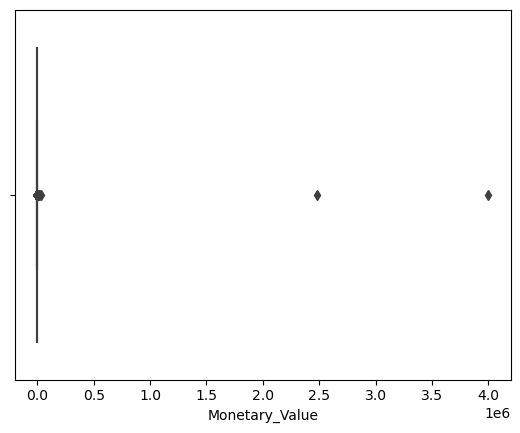

In [71]:
# Box plot
# To investigate outlier impact
sns.boxplot(x=training_set["Monetary_Value"])

In [72]:
# limits indicate quantiles on left (0+0.01) and right (1-0.01=0.99)
# Determine winsorization thresholds based on training set
Q1 = training_set["Monetary_Value"].quantile(0.05)  # 5th percentile
Q3 = training_set["Monetary_Value"].quantile(0.95)  # 95th percentile

lower_threshold = Q1
upper_threshold = Q3
print(lower_threshold)
print(upper_threshold)

# Apply winsorization
training_set["Monetary_Value"] = training_set["Monetary_Value"].clip(lower_threshold, upper_threshold)

7.44
421.51999999999975


<Axes: xlabel='Monetary_Value'>

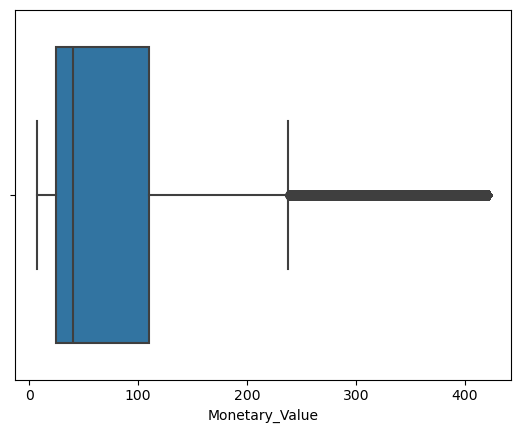

In [73]:
# Box plot
# To investigate outlier impact
sns.boxplot(x=training_set["Monetary_Value"])

In [74]:
training_set.describe()

,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,Frequency,...,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium,is_campaign_equal
count,34869.000000,34869.000000,34869.000000,34869.000000,3.486900e+04,3.486900e+04,3.486900e+04,34869.000000,34869.000000,34869.000000,...,34869.000000,34869.000000,34869.000000,34869.000000,34869.000000,34869.000000,34869.000000,34869.000000,34869.000000,34869.000000
mean,5399.615934,48.463965,43.918093,1.764507,1.564336e+02,2.208670e+02,9.467809e+01,8.591468,6.829103,4.228799,...,0.016290,0.111417,0.005191,0.000057,0.006567,0.007973,0.203304,0.043936,0.524879,0.082767
std,3134.148441,15.901272,16.226138,2.600776,1.705733e+04,2.520136e+04,1.327575e+04,3.297429,3.019434,7.892280,...,0.126589,0.314652,0.071861,0.007573,0.080774,0.088935,0.402462,0.204955,0.499388,0.275534
min,0.000000,20.000000,20.000000,0.000000,6.211765e-01,5.000000e+00,0.000000e+00,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2600.000000,36.000000,30.000000,0.000000,1.239000e+01,1.300000e+01,1.000000e+01,6.200000,4.100000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3730.000000,47.000000,40.000000,0.300000,2.493000e+01,3.000000e+01,2.479000e+01,9.100000,6.600000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8800.000000,59.000000,50.000000,2.800000,3.225000e+01,3.600000e+01,3.000000e+01,11.100000,9.400000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9992.000000,129.000000,120.000000,17.700000,2.479000e+06,4.000000e+06,2.479000e+06,18.200000,18.100000,238.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# limits indicate quantiles on left (0+0.01) and right (1-0.01=0.99)
# Determine winsorization thresholds based on training set

columns_to_winsorize = [
    "avg_amount", "max_amount", "min_amount", "Frequency", 
    "avg_donation_per_year", "tot_amount_3y", "avg_amount_3y", "campaign_count_3y", 'tot_amount_n','avg_amount_n','campaign_count_n','max_amount_n','min_amount_n'
]
Q1 = training_set[columns_to_winsorize].quantile(0.05)  # 5th percentile
Q3 = training_set[columns_to_winsorize].quantile(0.95)  # 95th percentile

lower_threshold = Q1
upper_threshold = Q3
print(lower_threshold)
print(upper_threshold)

# Apply winsorization
training_set[columns_to_winsorize] = training_set[columns_to_winsorize].clip(Q1, Q3,  axis=1 )

avg_amount               5.00
max_amount               5.00
min_amount               5.00
Frequency                1.00
avg_donation_per_year    0.09
tot_amount_3y            7.44
avg_amount_3y            5.00
campaign_count_3y        1.00
tot_amount_n             0.00
avg_amount_n             0.00
campaign_count_n         0.00
max_amount_n             0.00
min_amount_n             0.00
Name: 0.05, dtype: float64
avg_amount                50.00
max_amount                65.00
min_amount                49.58
Frequency                 15.00
avg_donation_per_year      1.35
tot_amount_3y            421.52
avg_amount_3y             50.00
campaign_count_3y         15.00
tot_amount_n               0.00
avg_amount_n               0.00
campaign_count_n           0.00
max_amount_n               0.00
min_amount_n               0.00
Name: 0.95, dtype: float64


In [76]:
training_set.shape

(34869, 47)

In [77]:
training_set['Monetary_Value'].describe()

count    34869.000000
mean        91.306734
std        111.257869
min          7.440000
25%         24.790000
50%         40.000000
75%        110.000000
max        421.520000
Name: Monetary_Value, dtype: float64

## FEATURES CONSTRUCTION FOR TEST SET

Changing data types and handling missing data

In [78]:
#Need to change the type of "date" to date_type
test_set['dateOfBirth']=pd.to_datetime(test_set['dateOfBirth'])

#Computing the age and age group for the donors
# Ensure the dateOfBirth column is in datetime format
test_set['dateOfBirth'] = pd.to_datetime(test_set['dateOfBirth'], format='%m/%d/%Y')
# Compute the age and age group based on the specified date
test_set['age'] = test_set['dateOfBirth'].apply(lambda dob: today_test.year - dob.year - ((today_test.month, today_test.day) < (dob.month, dob.day)))
test_set['age_group']=(test_set['age']//10)*10
#Drop Unnecessary columns
test_set=test_set.drop(columns=['dateOfBirth'])
# Display the donors table
test_set

,donorID,zipcode,province,region,gender,language,age,age_group
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,51,50
1,D100002,2260.0,Antwerp,Flanders,M,NL,67,60
7,D100008,1780.0,Flemish Brabant,Flanders,M,FR,81,80
8,D100009,1020.0,Brussels,Brussels,M,FR,87,80
9,D100010,1020.0,Brussels,Brussels,M,FR,35,30
...,...,...,...,...,...,...,...,...
44681,D144682,1640.0,Flemish Brabant,Flanders,M,FR,36,30
44682,D144683,9308.0,East Flanders,Flanders,NaN,NL,33,30
44685,D144686,2440.0,Antwerp,Flanders,F,NL,54,50
44689,D144690,1950.0,Flemish Brabant,Flanders,M,FR,43,40


In [79]:
## Investigating the number of missing values 
print(test_set.isnull().sum())

donorID       0
zipcode       1
province      0
region        0
gender       11
language      0
age           0
age_group     0
dtype: int64


In [80]:
#Merge the modeGender of trainning set per province with the test dataset 'test_set'
test_set=pd.merge(test_set,modeGender,on='province',how='left')
#Fill missing values in 'gender' with the mode for each province
test_set['gender']=test_set['gender'].fillna(test_set['gender_mode'])
#Dropping the gender_mode
test_set=test_set.drop(columns=['gender_mode'])

In [81]:
## Investigating the number of missing values 
print(test_set.isnull().sum())

donorID      0
zipcode      1
province     0
region       0
gender       0
language     0
age          0
age_group    0
dtype: int64


In [82]:
#Compute the merge on donorID
merged_df_test=pd.merge(gifts,test_set,on='donorID')
#rename columns to avoid complications
merged_df_test = merged_df_test.rename(columns={'date':'dateOfDonation'})
merged_df_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,age,age_group
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,51,50
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,51,50
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,51,50
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,51,50
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,51,50
...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,36,30
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,33,30
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,54,50
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,43,40


In [83]:
#merge the dataset with campaign 
donors_gift_campaign_test=pd.merge(merged_df_test,campaigns,on='campaignID', how='left')
donors_gift_campaign_test


,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,age,age_group,dateOfCampaign,lettersSent,CostUnit,TotalCost
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,51,50,NaT,NaN,NaN,NaN
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,51,50,2007-10-09,34636.0,0.31,10737.16
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,51,50,2007-12-08,34080.0,0.21,7156.80
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,51,50,2008-05-25,30558.0,0.41,12528.78
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,51,50,2008-06-22,39664.0,0.61,24195.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,36,30,2016-07-28,57127.0,0.26,14853.02
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,33,30,NaT,NaN,NaN,NaN
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,54,50,2015-04-24,18803.0,0.32,6016.96
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,43,40,2014-12-25,37833.0,0.50,18916.50


Group by DonorID

In [84]:

# Group by DonorID
donors_gift_campaign_test1 = donors_gift_campaign_test[donors_gift_campaign_test['dateOfDonation'] < today_test]
donation_summary_test = donors_gift_campaign_test1.groupby('donorID').agg(
    first_donation=('dateOfDonation', 'min'),  
    last_donation=('dateOfDonation', 'max'),
    tot_amount=('amount','sum'),
    avg_amount=('amount','mean'),
    campaign_count=('campaignID','count'),
    max_amount=('amount','max'),
    min_amount=('amount','min'),
).reset_index()
 
donors_gift_campaign_test = donors_gift_campaign_test.merge(donation_summary_test, on='donorID', how='left')
# Mostrar el resultado
donors_gift_campaign_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,lettersSent,CostUnit,TotalCost,first_donation,last_donation,tot_amount,avg_amount,campaign_count,max_amount,min_amount
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,NaN,NaN,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,34636.0,0.31,10737.16,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,34080.0,0.21,7156.80,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30558.0,0.41,12528.78,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,39664.0,0.61,24195.04,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,...,57127.0,0.26,14853.02,2016-08-10,2016-08-10,40.00,40.000000,1,40.0,40.00
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,...,NaN,NaN,NaN,2015-10-11,2015-10-11,50.00,50.000000,1,50.0,50.00
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,...,18803.0,0.32,6016.96,2015-04-28,2015-04-28,50.00,50.000000,1,50.0,50.00
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,37833.0,0.50,18916.50,2014-12-30,2014-12-30,40.00,40.000000,1,40.0,40.00


LOR

In [85]:
# Ensure the first_donation column is in datetime format
donors_gift_campaign_test['first_donation'] = pd.to_datetime(donors_gift_campaign_test['first_donation'], format='%m/%d/%Y')

# Calculate Length of Relationship (LOR) in years
donors_gift_campaign_test['LOR_days'] = (today_test - donors_gift_campaign_test['first_donation']).dt.days
donors_gift_campaign_test['LOR_years'] = (donors_gift_campaign_test['LOR_days'] / 365.25).round(1)  # Round to 1 decimal place
# Drop the LOR_days column if not needed
donors_gift_campaign_test.drop('LOR_days', axis=1, inplace=True)
# Display the updated dataset
donors_gift_campaign_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,CostUnit,TotalCost,first_donation,last_donation,tot_amount,avg_amount,campaign_count,max_amount,min_amount,LOR_years
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,NaN,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,0.31,10737.16,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,0.21,7156.80,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,0.41,12528.78,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,0.61,24195.04,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,...,0.26,14853.02,2016-08-10,2016-08-10,40.00,40.000000,1,40.0,40.00,2.8
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,...,NaN,NaN,2015-10-11,2015-10-11,50.00,50.000000,1,50.0,50.00,3.6
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,...,0.32,6016.96,2015-04-28,2015-04-28,50.00,50.000000,1,50.0,50.00,4.1
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,0.50,18916.50,2014-12-30,2014-12-30,40.00,40.000000,1,40.0,40.00,4.4


RECENCY

In [86]:
# Ensure the first_donation column is in datetime format
donors_gift_campaign_test['last_donation'] = pd.to_datetime(donors_gift_campaign_test['last_donation'], format='%m/%d/%Y')

# Calculate Length of Relationship (LOR) in years
donors_gift_campaign_test['Recency_days'] = (today_test - donors_gift_campaign_test['last_donation']).dt.days
donors_gift_campaign_test['Recency_years'] = (donors_gift_campaign_test['Recency_days'] / 365.25).round(1)  # Round to 1 decimal place
# Drop the LOR_days column if not needed
donors_gift_campaign_test.drop('Recency_days', axis=1, inplace=True)
# Display the updated dataset
donors_gift_campaign_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,TotalCost,first_donation,last_donation,tot_amount,avg_amount,campaign_count,max_amount,min_amount,LOR_years,Recency_years
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2,7.4
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,10737.16,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2,7.4
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7156.80,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2,7.4
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,12528.78,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2,7.4
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,24195.04,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.2,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,...,14853.02,2016-08-10,2016-08-10,40.00,40.000000,1,40.0,40.00,2.8,2.8
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,...,NaN,2015-10-11,2015-10-11,50.00,50.000000,1,50.0,50.00,3.6,3.6
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,...,6016.96,2015-04-28,2015-04-28,50.00,50.000000,1,50.0,50.00,4.1,4.1
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,18916.50,2014-12-30,2014-12-30,40.00,40.000000,1,40.0,40.00,4.4,4.4


FREQUENCY

In [87]:
donors_gift_campaign_test['Frequency']=donors_gift_campaign_test['campaign_count']
donors_gift_campaign_test = donors_gift_campaign_test.drop(columns=['campaign_count'])

MONETARY VALUE

In [88]:
donors_gift_campaign_test['Monetary_Value']=donors_gift_campaign_test['tot_amount']
donors_gift_campaign_test = donors_gift_campaign_test.drop(columns=['tot_amount'])
donors_gift_campaign_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,TotalCost,first_donation,last_donation,avg_amount,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,10737.16,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7156.80,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,12528.78,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,24195.04,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,...,14853.02,2016-08-10,2016-08-10,40.000000,40.0,40.00,2.8,2.8,1,40.00
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,...,NaN,2015-10-11,2015-10-11,50.000000,50.0,50.00,3.6,3.6,1,50.00
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,...,6016.96,2015-04-28,2015-04-28,50.000000,50.0,50.00,4.1,4.1,1,50.00
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,18916.50,2014-12-30,2014-12-30,40.000000,40.0,40.00,4.4,4.4,1,40.00


AVERAGE DONATION PER YEAR

In [89]:
donors_gift_campaign_test['avg_donation_per_year']=(donors_gift_campaign_test["Frequency"]/donors_gift_campaign_test['LOR_years']).round(2)
donors_gift_campaign_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,first_donation,last_donation,avg_amount,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value,avg_donation_per_year
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,...,2016-08-10,2016-08-10,40.000000,40.0,40.00,2.8,2.8,1,40.00,0.36
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,...,2015-10-11,2015-10-11,50.000000,50.0,50.00,3.6,3.6,1,50.00,0.28
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,...,2015-04-28,2015-04-28,50.000000,50.0,50.00,4.1,4.1,1,50.00,0.24
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,2014-12-30,2014-12-30,40.000000,40.0,40.00,4.4,4.4,1,40.00,0.23


DONOR LIFETIME

In [90]:
donors_gift_campaign_test['Donor_lifetime_days'] = (donors_gift_campaign_test['last_donation']-donors_gift_campaign_test['first_donation']).dt.days
donors_gift_campaign_test['Donor_lifetime_years'] = (donors_gift_campaign_test['Donor_lifetime_days'] / 365.25).round(1)
donors_gift_campaign_test = donors_gift_campaign_test.drop(columns=['Donor_lifetime_days'])
donors_gift_campaign_test = donors_gift_campaign_test.drop(columns=['first_donation','last_donation'])
donors_gift_campaign_test
 

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,TotalCost,avg_amount,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value,avg_donation_per_year,Donor_lifetime_years
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,10737.16,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7156.80,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,12528.78,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,24195.04,14.874167,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,...,14853.02,40.000000,40.0,40.00,2.8,2.8,1,40.00,0.36,0.0
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,...,NaN,50.000000,50.0,50.00,3.6,3.6,1,50.00,0.28,0.0
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,...,6016.96,50.000000,50.0,50.00,4.1,4.1,1,50.00,0.24,0.0
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,18916.50,40.000000,40.0,40.00,4.4,4.4,1,40.00,0.23,0.0


AVERAGE TILE BETWEEN DONATIONS

In [91]:
donors_gift_campaign_test = donors_gift_campaign_test.sort_values(by=['donorID', 'dateOfDonation'])

donors_gift_campaign_test['time_diff_months'] = donors_gift_campaign_test.groupby('donorID')['dateOfDonation'].diff().dt.days / 30.0
avg_time_between_donations_test = donors_gift_campaign_test.groupby('donorID')['time_diff_months'].mean().reset_index()
avg_time_between_donations_test.rename(columns={'time_diff_months': 'avg_time_between_donations'}, inplace=True)
donors_gift_campaign_test = donors_gift_campaign_test.merge(avg_time_between_donations_test, on='donorID', how='left')

donors_gift_campaign_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value,avg_donation_per_year,Donor_lifetime_years,time_diff_months,avg_time_between_donations
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8,NaN,8.6
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8,43.233333,8.6
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8,2.600000,8.6
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8,5.633333,8.6
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.2,7.4,12,178.49,0.79,7.8,0.833333,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,...,40.0,40.00,2.8,2.8,1,40.00,0.36,0.0,NaN,NaN
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,...,50.0,50.00,3.6,3.6,1,50.00,0.28,0.0,NaN,NaN
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,...,50.0,50.00,4.1,4.1,1,50.00,0.24,0.0,NaN,NaN
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,40.0,40.00,4.4,4.4,1,40.00,0.23,0.0,NaN,NaN


VARIABLES FOR THE LAST n YEARS

In [92]:
n= 1
date_limit_test = today_test - timedelta(days=365 * n)
donors_gift_campaign_test2=donors_gift_campaign_test[(donors_gift_campaign_test['dateOfDonation']>=date_limit_test)
&(donors_gift_campaign_test['dateOfDonation']<= today_test)]
 
donation_summary_testn = donors_gift_campaign_test2.groupby('donorID').agg(
    tot_amount_n=('amount','sum'),
    avg_amount_n=('amount','mean'),
    campaign_count_n=('campaignID','count'),
    max_amount_n=('amount','max'),
    min_amount_n=('amount','min'),

).reset_index()


donors_gift_campaign_test = donors_gift_campaign_test.merge(donation_summary_testn, on='donorID', how='left')

donors_gift_campaign_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,Monetary_Value,avg_donation_per_year,Donor_lifetime_years,time_diff_months,avg_time_between_donations,tot_amount_n,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.79,7.8,NaN,8.6,NaN,NaN,NaN,NaN,NaN
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.79,7.8,43.233333,8.6,NaN,NaN,NaN,NaN,NaN
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.79,7.8,2.600000,8.6,NaN,NaN,NaN,NaN,NaN
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.79,7.8,5.633333,8.6,NaN,NaN,NaN,NaN,NaN
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.79,7.8,0.833333,8.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,...,40.00,0.36,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,...,50.00,0.28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,...,50.00,0.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,40.00,0.23,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MOST FREQUENT MONTH

In [93]:
donors_gift_campaign_test['month'] = donors_gift_campaign_test['dateOfDonation'].dt.month


# Group by donor and month to calculate total donations per month
donations_per_month_test = donors_gift_campaign_test.groupby(['donorID', 'month'])['amount'].sum().reset_index()

# Find the month with the highest donations for each donor
most_frequent_month_test = donations_per_month_test.loc[donations_per_month_test.groupby('donorID')['amount'].idxmax()]

# Rename columns for clarity
most_frequent_month_test = most_frequent_month_test.rename(columns={'amount': 'total_donated', 'month': 'most_frequent_month'})

# Merge the most frequent month back to the original DataFrame
donors_gift_campaign_test = pd.merge(donors_gift_campaign_test, most_frequent_month_test[['donorID', 'most_frequent_month']], on='donorID', how='left')
donors_gift_campaign_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,Donor_lifetime_years,time_diff_months,avg_time_between_donations,tot_amount_n,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n,month,most_frequent_month
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,NaN,8.6,NaN,NaN,NaN,NaN,NaN,3,12
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,43.233333,8.6,NaN,NaN,NaN,NaN,NaN,10,12
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,2.600000,8.6,NaN,NaN,NaN,NaN,NaN,12,12
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,5.633333,8.6,NaN,NaN,NaN,NaN,NaN,6,12
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,0.833333,8.6,NaN,NaN,NaN,NaN,NaN,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109649,D144682,4383.0,40.00,2016-08-10,NaN,1640.0,Flemish Brabant,Flanders,M,FR,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8
109650,D144683,0.0,50.00,2015-10-11,NaN,9308.0,East Flanders,Flanders,M,NL,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10
109651,D144686,4141.0,50.00,2015-04-28,NaN,2440.0,Antwerp,Flanders,F,NL,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
109652,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12


Aggregating by 'donorID' 

In [94]:
test_set=donors_gift_campaign_test[donors_gift_campaign_test['dateOfDonation']<today_test]

Inspecting the dataset

In [95]:
test_set.fillna(0, inplace=True)

In [96]:
test_set=test_set.groupby(['donorID','zipcode','province','region','gender','age','age_group','language','Donor_lifetime_years', 'avg_amount','max_amount',
'min_amount','LOR_years','Recency_years','Frequency','Monetary_Value','avg_donation_per_year', 'tot_amount_n',	'avg_amount_n',	'campaign_count_n',	'max_amount_n'	,'min_amount_n', 'most_frequent_month']).agg(
    tot_amount_3y=('amount','sum'),
    avg_amount_3y=('amount','mean'),
    campaign_count_3y=('campaignID','count'),
    lettersSent=('lettersSent','mean'),
    CostUnit=('CostUnit','mean')
).reset_index()
test_set

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n,most_frequent_month,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit
0,D100001,1861.0,Flemish Brabant,Flanders,F,51,50,NL,7.8,14.874167,...,0.0,0.0,0.0,0.0,12,178.49,14.874167,12,30137.666667,0.307500
1,D100002,2260.0,Antwerp,Flanders,M,67,60,NL,0.0,20.000000,...,0.0,0.0,0.0,0.0,1,20.00,20.000000,1,37833.000000,0.500000
2,D100008,1780.0,Flemish Brabant,Flanders,M,81,80,FR,4.4,41.456667,...,0.0,0.0,0.0,0.0,10,124.37,41.456667,3,30994.000000,0.440000
3,D100009,1020.0,Brussels,Brussels,M,87,80,FR,6.2,17.198947,...,0.0,0.0,0.0,0.0,4,326.78,17.198947,19,34788.105263,0.433158
4,D100010,1020.0,Brussels,Brussels,M,35,30,FR,0.0,40.000000,...,0.0,0.0,0.0,0.0,1,40.00,40.000000,1,37833.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25639,D144682,1640.0,Flemish Brabant,Flanders,M,36,30,FR,0.0,40.000000,...,0.0,0.0,0.0,0.0,8,40.00,40.000000,1,57127.000000,0.260000
25640,D144683,9308.0,East Flanders,Flanders,M,33,30,NL,0.0,50.000000,...,0.0,0.0,0.0,0.0,10,50.00,50.000000,1,0.000000,0.000000
25641,D144686,2440.0,Antwerp,Flanders,F,54,50,NL,0.0,50.000000,...,0.0,0.0,0.0,0.0,4,50.00,50.000000,1,18803.000000,0.320000
25642,D144690,1950.0,Flemish Brabant,Flanders,M,43,40,FR,0.0,40.000000,...,0.0,0.0,0.0,0.0,12,40.00,40.000000,1,37833.000000,0.500000


In [97]:
##Target variable in the test set
target_test_set = donors_gift_campaign_test[donors_gift_campaign_test['dateOfDonation'] >= '2019-06-18']
target_test_set = target_test_set[target_test_set['dateOfDonation'] < '2019-09-18']
#target_test_set=target_test_set[target_test_set['campaignID']!=0]
target_test_set = target_test_set[target_test_set['campaignID']==7244]
target_test_set


,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,Donor_lifetime_years,time_diff_months,avg_time_between_donations,tot_amount_n,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n,month,most_frequent_month
2460,D100724,7244.0,40.0,2019-07-04,2614.0,2180.0,Antwerp,Flanders,M,NL,...,6.0,87.133333,10.995556,NaN,NaN,NaN,NaN,NaN,7,3
3241,D100896,7244.0,10.0,2019-06-28,2696.0,2100.0,Antwerp,Flanders,M,NL,...,6.3,89.866667,11.919048,NaN,NaN,NaN,NaN,NaN,6,10
3478,D100964,7244.0,100.0,2019-06-30,3096.0,2520.0,Antwerp,Flanders,F,NL,...,1.1,103.200000,23.386667,NaN,NaN,NaN,NaN,NaN,6,4
3871,D101066,7244.0,60.0,2019-07-06,3620.0,2275.0,Antwerp,Flanders,M,NL,...,4.0,120.666667,11.255556,NaN,NaN,NaN,NaN,NaN,7,7
3903,D101069,7244.0,80.0,2019-07-06,3560.0,2250.0,Antwerp,Flanders,F,NL,...,4.2,118.666667,5.381250,NaN,NaN,NaN,NaN,NaN,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108776,D144369,7244.0,6.0,2019-07-01,15.0,7140.0,Hainaut,Wallonia,M,FR,...,3.4,0.500000,4.470000,13.2,3.3,4.0,3.3,3.3,7,1
108781,D144371,7244.0,100.0,2019-07-02,359.0,3500.0,Limburg,Flanders,M,NL,...,8.7,11.966667,29.350000,49.5,49.5,1.0,49.5,49.5,7,7
109197,D144481,7244.0,80.0,2019-06-23,2427.0,9300.0,East Flanders,Flanders,F,NL,...,7.0,80.900000,8.182540,NaN,NaN,NaN,NaN,NaN,6,6
109280,D144512,7244.0,20.0,2019-07-07,1525.0,8380.0,West Flanders,Flanders,M,NL,...,0.0,50.833333,50.833333,NaN,NaN,NaN,NaN,NaN,7,7


In [98]:
#Grouping
target_test_set=target_test_set.groupby(['donorID','zipcode','province','region','gender','age','age_group','language']).agg(
    tot_amount=('amount','sum'),
    avg_amount=('amount','mean'),
    campaign_count=('campaignID','count')
).reset_index()
target_test_set

,donorID,zipcode,province,region,gender,age,age_group,language,tot_amount,avg_amount,campaign_count
0,D100724,2180.0,Antwerp,Flanders,M,68,60,NL,40.0,40.0,1
1,D100896,2100.0,Antwerp,Flanders,M,36,30,NL,10.0,10.0,1
2,D100964,2520.0,Antwerp,Flanders,F,46,40,NL,100.0,100.0,1
3,D101066,2275.0,Antwerp,Flanders,M,76,70,NL,60.0,60.0,1
4,D101069,2250.0,Antwerp,Flanders,F,44,40,NL,80.0,80.0,1
...,...,...,...,...,...,...,...,...,...,...,...
356,D144369,7140.0,Hainaut,Wallonia,M,61,60,FR,6.0,6.0,1
357,D144371,3500.0,Limburg,Flanders,M,70,70,NL,100.0,100.0,1
358,D144481,9300.0,East Flanders,Flanders,F,69,60,NL,80.0,80.0,1
359,D144512,8380.0,West Flanders,Flanders,M,37,30,NL,20.0,20.0,1


In [99]:
target_test_set['tot_amount'].describe()

count    361.000000
mean      51.567867
std       39.688670
min        2.000000
25%       20.000000
50%       40.000000
75%       80.000000
max      228.000000
Name: tot_amount, dtype: float64

Target Set for Test set in which we add dummy encoding column: 1 if tot_amount >= 1, otherwise 0

In [100]:
target_test_set['tot_amount_dummy'] = (target_test_set['tot_amount'] >= 2).astype(int)
target_test_set

,donorID,zipcode,province,region,gender,age,age_group,language,tot_amount,avg_amount,campaign_count,tot_amount_dummy
0,D100724,2180.0,Antwerp,Flanders,M,68,60,NL,40.0,40.0,1,1
1,D100896,2100.0,Antwerp,Flanders,M,36,30,NL,10.0,10.0,1,1
2,D100964,2520.0,Antwerp,Flanders,F,46,40,NL,100.0,100.0,1,1
3,D101066,2275.0,Antwerp,Flanders,M,76,70,NL,60.0,60.0,1,1
4,D101069,2250.0,Antwerp,Flanders,F,44,40,NL,80.0,80.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
356,D144369,7140.0,Hainaut,Wallonia,M,61,60,FR,6.0,6.0,1,1
357,D144371,3500.0,Limburg,Flanders,M,70,70,NL,100.0,100.0,1,1
358,D144481,9300.0,East Flanders,Flanders,F,69,60,NL,80.0,80.0,1,1
359,D144512,8380.0,West Flanders,Flanders,M,37,30,NL,20.0,20.0,1,1


In [101]:
target_test_set = target_test_set[['donorID', 'tot_amount_dummy']]
target_test_set


,donorID,tot_amount_dummy
0,D100724,1
1,D100896,1
2,D100964,1
3,D101066,1
4,D101069,1
...,...,...
356,D144369,1
357,D144371,1
358,D144481,1
359,D144512,1


MERGE IT ON THE TEST SET

In [102]:
test_set=pd.merge(test_set,target_test_set,on='donorID',how='left')
test_set

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,campaign_count_n,max_amount_n,min_amount_n,most_frequent_month,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,tot_amount_dummy
0,D100001,1861.0,Flemish Brabant,Flanders,F,51,50,NL,7.8,14.874167,...,0.0,0.0,0.0,12,178.49,14.874167,12,30137.666667,0.307500,NaN
1,D100002,2260.0,Antwerp,Flanders,M,67,60,NL,0.0,20.000000,...,0.0,0.0,0.0,1,20.00,20.000000,1,37833.000000,0.500000,NaN
2,D100008,1780.0,Flemish Brabant,Flanders,M,81,80,FR,4.4,41.456667,...,0.0,0.0,0.0,10,124.37,41.456667,3,30994.000000,0.440000,NaN
3,D100009,1020.0,Brussels,Brussels,M,87,80,FR,6.2,17.198947,...,0.0,0.0,0.0,4,326.78,17.198947,19,34788.105263,0.433158,NaN
4,D100010,1020.0,Brussels,Brussels,M,35,30,FR,0.0,40.000000,...,0.0,0.0,0.0,1,40.00,40.000000,1,37833.000000,0.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25639,D144682,1640.0,Flemish Brabant,Flanders,M,36,30,FR,0.0,40.000000,...,0.0,0.0,0.0,8,40.00,40.000000,1,57127.000000,0.260000,NaN
25640,D144683,9308.0,East Flanders,Flanders,M,33,30,NL,0.0,50.000000,...,0.0,0.0,0.0,10,50.00,50.000000,1,0.000000,0.000000,NaN
25641,D144686,2440.0,Antwerp,Flanders,F,54,50,NL,0.0,50.000000,...,0.0,0.0,0.0,4,50.00,50.000000,1,18803.000000,0.320000,NaN
25642,D144690,1950.0,Flemish Brabant,Flanders,M,43,40,FR,0.0,40.000000,...,0.0,0.0,0.0,12,40.00,40.000000,1,37833.000000,0.500000,NaN


Analyse it

In [103]:
#Replace the 'NaN' within the 'tot_amount_dummy' with 0, since they are not present into the target_set and hence not made a donation
test_set['tot_amount_dummy'] = test_set['tot_amount_dummy'].fillna(0).astype(int)
test_set.head()

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,campaign_count_n,max_amount_n,min_amount_n,most_frequent_month,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,tot_amount_dummy
0,D100001,1861.0,Flemish Brabant,Flanders,F,51,50,NL,7.8,14.874167,...,0.0,0.0,0.0,12,178.49,14.874167,12,30137.666667,0.307500,0
1,D100002,2260.0,Antwerp,Flanders,M,67,60,NL,0.0,20.000000,...,0.0,0.0,0.0,1,20.00,20.000000,1,37833.000000,0.500000,0
2,D100008,1780.0,Flemish Brabant,Flanders,M,81,80,FR,4.4,41.456667,...,0.0,0.0,0.0,10,124.37,41.456667,3,30994.000000,0.440000,0
3,D100009,1020.0,Brussels,Brussels,M,87,80,FR,6.2,17.198947,...,0.0,0.0,0.0,4,326.78,17.198947,19,34788.105263,0.433158,0
4,D100010,1020.0,Brussels,Brussels,M,35,30,FR,0.0,40.000000,...,0.0,0.0,0.0,1,40.00,40.000000,1,37833.000000,0.500000,0


In [104]:
test_set[['donorID','tot_amount_dummy']].groupby(['tot_amount_dummy']).count()

,donorID
tot_amount_dummy,
0,25283
1,361


In [105]:
print(test_set.isnull().sum())

donorID                  0
zipcode                  0
province                 0
region                   0
gender                   0
age                      0
age_group                0
language                 0
Donor_lifetime_years     0
avg_amount               0
max_amount               0
min_amount               0
LOR_years                0
Recency_years            0
Frequency                0
Monetary_Value           0
avg_donation_per_year    0
tot_amount_n             0
avg_amount_n             0
campaign_count_n         0
max_amount_n             0
min_amount_n             0
most_frequent_month      0
tot_amount_3y            0
avg_amount_3y            0
campaign_count_3y        0
lettersSent              0
CostUnit                 0
tot_amount_dummy         0
dtype: int64


We want to create other features, the following one will be on how rich the province is and hence how 'rich' is the donor based on the GDP_per_capita of each Province in 2019.

In [106]:
gdp_pc_province_2019=pd.read_csv(Data + r"/GDP_per_province_2019.csv", sep=',')
gdp_pc_province_2019

,province,GDP,Population,GDP per Capita
0,Antwerp,98189000000,1857986.00,52847.01
1,Brussels,90459000000,1208542.00,74849.69
2,East Flanders,62123000000,1515064.00,41003.55
3,Flemish Brabant,51731000000,1146175.00,45133.60
4,Hainaut,36940000000,1344241.00,27480.19
5,Liege,34715000000,1106992.00,31359.76
6,Limburg,31766000000,874048.00,36343.54
7,Luxembourg,7887000000,284638.00,27708.88
8,Missing,45635000000,1039218.73,43912.80
9,Namur,14697000000,494325.00,29731.45


Analyse and Investigate

In [107]:
gdp_pc_province_2019.dtypes

province           object
GDP                 int64
Population        float64
GDP per Capita    float64
dtype: object

In [108]:
gdp_pc_province_2019.describe()

,GDP,Population,GDP per Capita
count,1.200000e+01,1.200000e+01,12.000000
mean,4.563500e+10,1.039219e+06,42211.845833
std,2.778718e+10,4.628628e+05,13594.967327
min,7.887000e+09,2.846380e+05,27480.190000
25%,2.911325e+10,7.791172e+05,30952.682500
50%,4.128750e+10,1.126584e+06,42379.670000
75%,5.477300e+10,1.242467e+06,46954.172500
max,9.818900e+10,1.857986e+06,74849.690000


Categorize the GDP per Capita

In [109]:
# Define thresholds based on percentiles
low_threshold = gdp_pc_province_2019["GDP per Capita"].quantile(0.33)
high_threshold = gdp_pc_province_2019["GDP per Capita"].quantile(0.67)

# Categorize regions
def categorize_gdp_per_capita(gdp_per_capita):
    if gdp_per_capita < low_threshold:
        return "Low"
    elif gdp_per_capita < high_threshold:
        return "Medium"
    else:
        return "High"

# Apply categorization
gdp_pc_province_2019["Category"] = gdp_pc_province_2019["GDP per Capita"].apply(categorize_gdp_per_capita)

gdp_pc_province_2019

,province,GDP,Population,GDP per Capita,Category
0,Antwerp,98189000000,1857986.00,52847.01,High
1,Brussels,90459000000,1208542.00,74849.69,High
2,East Flanders,62123000000,1515064.00,41003.55,Medium
3,Flemish Brabant,51731000000,1146175.00,45133.60,High
4,Hainaut,36940000000,1344241.00,27480.19,Low
5,Liege,34715000000,1106992.00,31359.76,Low
6,Limburg,31766000000,874048.00,36343.54,Medium
7,Luxembourg,7887000000,284638.00,27708.88,Low
8,Missing,45635000000,1039218.73,43912.80,Medium
9,Namur,14697000000,494325.00,29731.45,Low


In [110]:
gdp_pc_province_2019.dtypes

province           object
GDP                 int64
Population        float64
GDP per Capita    float64
Category           object
dtype: object

In [111]:
test_set=pd.merge(test_set,gdp_pc_province_2019,on='province',how='left')
test_set

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,tot_amount_dummy,GDP,Population,GDP per Capita,Category
0,D100001,1861.0,Flemish Brabant,Flanders,F,51,50,NL,7.8,14.874167,...,178.49,14.874167,12,30137.666667,0.307500,0,5.173100e+10,1146175.0,45133.60,High
1,D100002,2260.0,Antwerp,Flanders,M,67,60,NL,0.0,20.000000,...,20.00,20.000000,1,37833.000000,0.500000,0,9.818900e+10,1857986.0,52847.01,High
2,D100008,1780.0,Flemish Brabant,Flanders,M,81,80,FR,4.4,41.456667,...,124.37,41.456667,3,30994.000000,0.440000,0,5.173100e+10,1146175.0,45133.60,High
3,D100009,1020.0,Brussels,Brussels,M,87,80,FR,6.2,17.198947,...,326.78,17.198947,19,34788.105263,0.433158,0,9.045900e+10,1208542.0,74849.69,High
4,D100010,1020.0,Brussels,Brussels,M,35,30,FR,0.0,40.000000,...,40.00,40.000000,1,37833.000000,0.500000,0,9.045900e+10,1208542.0,74849.69,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25639,D144682,1640.0,Flemish Brabant,Flanders,M,36,30,FR,0.0,40.000000,...,40.00,40.000000,1,57127.000000,0.260000,0,5.173100e+10,1146175.0,45133.60,High
25640,D144683,9308.0,East Flanders,Flanders,M,33,30,NL,0.0,50.000000,...,50.00,50.000000,1,0.000000,0.000000,0,6.212300e+10,1515064.0,41003.55,Medium
25641,D144686,2440.0,Antwerp,Flanders,F,54,50,NL,0.0,50.000000,...,50.00,50.000000,1,18803.000000,0.320000,0,9.818900e+10,1857986.0,52847.01,High
25642,D144690,1950.0,Flemish Brabant,Flanders,M,43,40,FR,0.0,40.000000,...,40.00,40.000000,1,37833.000000,0.500000,0,5.173100e+10,1146175.0,45133.60,High


## One Hot Encoding for the Featues of the test set

Gender

In [112]:
test_set = test_set.join(get_dummies(test_set["gender"], prefix = "fl_gender_is", drop_first = True))


#We want to have binary values for each feature (1/0).

test_set = test_set.replace(True, 1)
test_set = test_set.replace(False, 0)
test_set = test_set.drop(columns=['gender'])
test_set

,donorID,zipcode,province,region,age,age_group,language,Donor_lifetime_years,avg_amount,max_amount,...,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,tot_amount_dummy,GDP,Population,GDP per Capita,Category,fl_gender_is_M
0,D100001,1861.0,Flemish Brabant,Flanders,51,50,NL,7.8,14.874167,30.0,...,14.874167,12,30137.666667,0.307500,0,5.173100e+10,1146175.0,45133.60,High,0
1,D100002,2260.0,Antwerp,Flanders,67,60,NL,0.0,20.000000,20.0,...,20.000000,1,37833.000000,0.500000,0,9.818900e+10,1857986.0,52847.01,High,1
2,D100008,1780.0,Flemish Brabant,Flanders,81,80,FR,4.4,41.456667,50.0,...,41.456667,3,30994.000000,0.440000,0,5.173100e+10,1146175.0,45133.60,High,1
3,D100009,1020.0,Brussels,Brussels,87,80,FR,6.2,17.198947,25.0,...,17.198947,19,34788.105263,0.433158,0,9.045900e+10,1208542.0,74849.69,High,1
4,D100010,1020.0,Brussels,Brussels,35,30,FR,0.0,40.000000,40.0,...,40.000000,1,37833.000000,0.500000,0,9.045900e+10,1208542.0,74849.69,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25639,D144682,1640.0,Flemish Brabant,Flanders,36,30,FR,0.0,40.000000,40.0,...,40.000000,1,57127.000000,0.260000,0,5.173100e+10,1146175.0,45133.60,High,1
25640,D144683,9308.0,East Flanders,Flanders,33,30,NL,0.0,50.000000,50.0,...,50.000000,1,0.000000,0.000000,0,6.212300e+10,1515064.0,41003.55,Medium,1
25641,D144686,2440.0,Antwerp,Flanders,54,50,NL,0.0,50.000000,50.0,...,50.000000,1,18803.000000,0.320000,0,9.818900e+10,1857986.0,52847.01,High,0
25642,D144690,1950.0,Flemish Brabant,Flanders,43,40,FR,0.0,40.000000,40.0,...,40.000000,1,37833.000000,0.500000,0,5.173100e+10,1146175.0,45133.60,High,1


Region

In [113]:
test_set = test_set.join(get_dummies(test_set["region"], prefix = "fl_region_is", drop_first = True))
test_set = test_set.replace(True, 1)
test_set = test_set.replace(False, 0)
test_set = test_set.drop(columns=['region'])


Language

In [114]:

test_set = test_set.join(get_dummies(test_set["language"], prefix = "fl_language_is", drop_first = True))
test_set = test_set.replace(True, 1)
test_set = test_set.replace(False, 0)
test_set = test_set.drop(columns=['language'])

Province

In [115]:

test_set = test_set.join(get_dummies(test_set["province"], prefix = "fl_province_is", drop_first = True))
test_set = test_set.replace(True, 1)
test_set = test_set.replace(False, 0)
test_set = test_set.drop(columns=['province'])


Level of Richness by province

In [116]:
test_set = test_set.join(get_dummies(test_set["Category"], prefix = "fl_Category_is", drop_first = True))
test_set = test_set.replace(True, 1)
test_set = test_set.replace(False, 0)
test_set = test_set.drop(columns=['GDP','GDP per Capita','Category'])
test_set

,donorID,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,...,fl_province_is_Hainaut,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium
0,D100001,1861.0,51,50,7.8,14.874167,30.0,6.69,15.2,7.4,...,0,0,0,0,0,0,0,0,0,0
1,D100002,2260.0,67,60,0.0,20.000000,20.0,20.00,4.4,4.4,...,0,0,0,0,0,0,0,0,0,0
2,D100008,1780.0,81,80,4.4,41.456667,50.0,24.79,11.9,7.6,...,0,0,0,0,0,0,0,0,0,0
3,D100009,1020.0,87,80,6.2,17.198947,25.0,7.44,13.3,7.1,...,0,0,0,0,0,0,0,0,0,0
4,D100010,1020.0,35,30,0.0,40.000000,40.0,40.00,4.3,4.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25639,D144682,1640.0,36,30,0.0,40.000000,40.0,40.00,2.8,2.8,...,0,0,0,0,0,0,0,0,0,0
25640,D144683,9308.0,33,30,0.0,50.000000,50.0,50.00,3.6,3.6,...,0,0,0,0,0,0,0,0,0,1
25641,D144686,2440.0,54,50,0.0,50.000000,50.0,50.00,4.1,4.1,...,0,0,0,0,0,0,0,0,0,0
25642,D144690,1950.0,43,40,0.0,40.000000,40.0,40.00,4.4,4.4,...,0,0,0,0,0,0,0,0,0,0


In [117]:
print(training_set.isnull().sum())

donorID                           0
zipcode                           0
age                               0
age_group                         0
Donor_lifetime_years              0
avg_amount                        0
max_amount                        0
min_amount                        0
LOR_years                         0
Recency_years                     0
Frequency                         0
Monetary_Value                    0
avg_donation_per_year             0
tot_amount_n                      0
avg_amount_n                      0
campaign_count_n                  0
max_amount_n                      0
min_amount_n                      0
most_frequent_month               0
tot_amount_3y                     0
avg_amount_3y                     0
campaign_count_3y                 0
lettersSent                       0
CostUnit                          0
tot_amount_dummy                  0
Population                        0
fl_gender_is_M                    0
fl_region_is_Flanders       

In [118]:
test_set.dtypes

donorID                            object
zipcode                           float64
age                                 int64
age_group                           int64
Donor_lifetime_years              float64
avg_amount                        float64
max_amount                        float64
min_amount                        float64
LOR_years                         float64
Recency_years                     float64
Frequency                           int64
Monetary_Value                    float64
avg_donation_per_year             float64
tot_amount_n                      float64
avg_amount_n                      float64
campaign_count_n                  float64
max_amount_n                      float64
min_amount_n                      float64
most_frequent_month                 int32
tot_amount_3y                     float64
avg_amount_3y                     float64
campaign_count_3y                   int64
lettersSent                       float64
CostUnit                          

In [119]:
test_set.describe()

,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,Frequency,...,fl_province_is_Hainaut,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium
count,25644.000000,25644.000000,25644.000000,25644.000000,2.564400e+04,2.564400e+04,2.564400e+04,25644.000000,25644.000000,25644.000000,...,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000
mean,5435.159725,49.134963,44.549602,1.902808,2.027002e+02,2.882683e+02,1.201985e+02,8.497961,6.596428,4.249571,...,0.017197,0.017587,0.115544,0.005771,0.000039,0.007604,0.008540,0.204375,0.048159,0.531625
std,3127.320839,15.810969,16.168855,2.711101,1.988988e+04,2.938645e+04,1.548033e+04,3.273993,2.555571,7.351188,...,0.130007,0.131447,0.319683,0.075751,0.006245,0.086871,0.092019,0.403252,0.214107,0.499009
min,0.000000,20.000000,20.000000,0.000000,6.211765e-01,5.000000e+00,0.000000e+00,2.300000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2607.500000,37.000000,30.000000,0.000000,1.239000e+01,1.300000e+01,1.000000e+01,6.000000,4.200000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3770.000000,47.000000,40.000000,0.400000,2.666857e+01,3.000000e+01,2.479000e+01,8.300000,6.800000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8800.000000,59.000000,50.000000,3.100000,3.274200e+01,3.900000e+01,3.000000e+01,11.000000,8.600000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9992.000000,129.000000,120.000000,18.000000,2.479000e+06,4.000000e+06,2.479000e+06,18.900000,13.200000,238.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Is the month of the campaign (June) the most frequent month in the dataset?

In [120]:
Month_Campaing_Test = 6

test_set['is_campaign_equal'] = (test_set['most_frequent_month'] == Month_Campaing_Test).astype(int)

test_set

,donorID,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,...,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium,is_campaign_equal
0,D100001,1861.0,51,50,7.8,14.874167,30.0,6.69,15.2,7.4,...,0,0,0,0,0,0,0,0,0,0
1,D100002,2260.0,67,60,0.0,20.000000,20.0,20.00,4.4,4.4,...,0,0,0,0,0,0,0,0,0,0
2,D100008,1780.0,81,80,4.4,41.456667,50.0,24.79,11.9,7.6,...,0,0,0,0,0,0,0,0,0,0
3,D100009,1020.0,87,80,6.2,17.198947,25.0,7.44,13.3,7.1,...,0,0,0,0,0,0,0,0,0,0
4,D100010,1020.0,35,30,0.0,40.000000,40.0,40.00,4.3,4.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25639,D144682,1640.0,36,30,0.0,40.000000,40.0,40.00,2.8,2.8,...,0,0,0,0,0,0,0,0,0,0
25640,D144683,9308.0,33,30,0.0,50.000000,50.0,50.00,3.6,3.6,...,0,0,0,0,0,0,0,0,1,0
25641,D144686,2440.0,54,50,0.0,50.000000,50.0,50.00,4.1,4.1,...,0,0,0,0,0,0,0,0,0,0
25642,D144690,1950.0,43,40,0.0,40.000000,40.0,40.00,4.4,4.4,...,0,0,0,0,0,0,0,0,0,0


Outliers test data

<Axes: xlabel='Monetary_Value'>

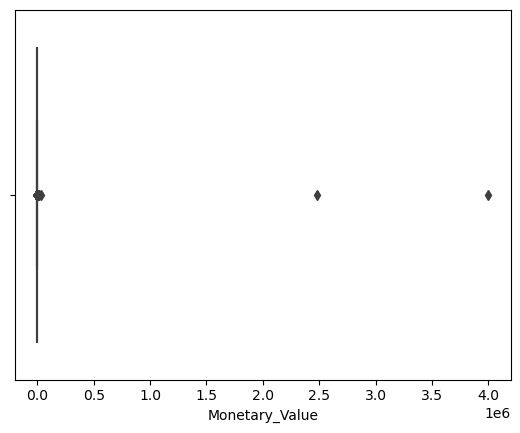

In [121]:
# Box plot
# To investigate outlier impact
sns.boxplot(x=test_set["Monetary_Value"])

In [122]:
# limits indicate quantiles on left (0+0.01) and right (1-0.01=0.99)
# Determine winsorization thresholds based on training set
Q1 = test_set["Monetary_Value"].quantile(0.05)  # 5th percentile
Q3 = test_set["Monetary_Value"].quantile(0.95)  # 95th percentile

lower_threshold = Q1
upper_threshold = Q3
print(lower_threshold)
print(upper_threshold)

# Apply winsorization
test_set["Monetary_Value"] = test_set["Monetary_Value"].clip(lower_threshold, upper_threshold)

5.0
427.4679999999999


In [123]:
# limits indicate quantiles on left (0+0.01) and right (1-0.01=0.99)
# Determine winsorization thresholds based on training set

columns_to_winsorize = [
     "avg_amount", "max_amount", "min_amount", "Frequency", 
    "avg_donation_per_year", "tot_amount_3y", "avg_amount_3y", "campaign_count_3y", 'tot_amount_n','avg_amount_n','campaign_count_n','max_amount_n','min_amount_n'
]
Q1 = test_set[columns_to_winsorize].quantile(0.05)  # 1th percentile
Q3 = test_set[columns_to_winsorize].quantile(0.95)  # 99th percentile

lower_threshold = Q1
upper_threshold = Q3
print(lower_threshold)
print(upper_threshold)

# Apply winsorization
test_set[columns_to_winsorize] = test_set[columns_to_winsorize].clip(Q1, Q3,  axis=1 ) 

avg_amount               5.0
max_amount               5.0
min_amount               5.0
Frequency                1.0
avg_donation_per_year    0.1
tot_amount_3y            5.0
avg_amount_3y            5.0
campaign_count_3y        1.0
tot_amount_n             0.0
avg_amount_n             0.0
campaign_count_n         0.0
max_amount_n             0.0
min_amount_n             0.0
Name: 0.05, dtype: float64
avg_amount                50.000
max_amount                70.000
min_amount                50.000
Frequency                 15.000
avg_donation_per_year      1.270
tot_amount_3y            427.468
avg_amount_3y             50.000
campaign_count_3y         15.000
tot_amount_n               0.000
avg_amount_n               0.000
campaign_count_n           0.000
max_amount_n               0.000
min_amount_n               0.000
Name: 0.95, dtype: float64


In [124]:
test_set['CostUnit'].fillna(0,inplace=True)
test_set['lettersSent'].fillna(0,inplace=True)
test_set['Population'].fillna(0,inplace=True)

In [125]:
print(test_set.isnull().sum())

donorID                           0
zipcode                           0
age                               0
age_group                         0
Donor_lifetime_years              0
avg_amount                        0
max_amount                        0
min_amount                        0
LOR_years                         0
Recency_years                     0
Frequency                         0
Monetary_Value                    0
avg_donation_per_year             0
tot_amount_n                      0
avg_amount_n                      0
campaign_count_n                  0
max_amount_n                      0
min_amount_n                      0
most_frequent_month               0
tot_amount_3y                     0
avg_amount_3y                     0
campaign_count_3y                 0
lettersSent                       0
CostUnit                          0
tot_amount_dummy                  0
Population                        0
fl_gender_is_M                    0
fl_region_is_Flanders       

In [126]:
print(test_set.shape)
print (training_set.shape)

(25644, 47)
(34869, 47)


Calculate the amount of dummies

In [127]:
test_set[["donorID",'tot_amount_dummy']].groupby(["tot_amount_dummy"]).count()

,donorID
tot_amount_dummy,
0,25283
1,361


In [128]:
training_set[["donorID",'tot_amount_dummy']].groupby(["tot_amount_dummy"]).count()

,donorID
tot_amount_dummy,
0,33694
1,1175


In [129]:
test_set.describe()

,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,Frequency,...,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium,is_campaign_equal
count,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,...,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000,25644.000000
mean,5435.159725,49.134963,44.549602,1.902808,24.888717,29.292696,21.748664,8.497961,6.596428,3.663430,...,0.017587,0.115544,0.005771,0.000039,0.007604,0.008540,0.204375,0.048159,0.531625,0.093043
std,3127.320839,15.810969,16.168855,2.711101,12.966517,16.442629,12.735460,3.273993,2.555571,3.942278,...,0.131447,0.319683,0.075751,0.006245,0.086871,0.092019,0.403252,0.214107,0.499009,0.290499
min,0.000000,20.000000,20.000000,0.000000,5.000000,5.000000,5.000000,2.300000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2607.500000,37.000000,30.000000,0.000000,12.390000,13.000000,10.000000,6.000000,4.200000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3770.000000,47.000000,40.000000,0.400000,26.668571,30.000000,24.790000,8.300000,6.800000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8800.000000,59.000000,50.000000,3.100000,32.742000,39.000000,30.000000,11.000000,8.600000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9992.000000,129.000000,120.000000,18.000000,50.000000,70.000000,50.000000,18.900000,13.200000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## RUN THE MODELS 

We need to run the model, in order to understand which among them performs better than a random selection

In [130]:
pip install kds

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [131]:
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
import kds
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from pandas               import get_dummies
from numpy                import where
from sklearn.feature_selection import SelectFromModel


1) Select X and Y  dataframes

In [132]:
X_train = training_set.drop(columns=['tot_amount_dummy', 'donorID','age_group','zipcode'])  
y_train = training_set['tot_amount_dummy']

X_test=test_set.drop(columns=['tot_amount_dummy', 'donorID','age_group','zipcode']) 
y_test = test_set['tot_amount_dummy']

2) Standardize the data

In [133]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now let's impute the code for running the models

In [134]:
# Define a dictionary of algorithms and their hyperparameters
model_configs = {
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
        "params": {
            "classifier__max_depth": [3, 5, 10, None],
            "classifier__min_samples_split": [2, 5, 10],
        },
    },
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42, class_weight="balanced", solver="liblinear"),
        "params": {
            "classifier__C": np.logspace(-3, 3, 7),  # Regularization strength
        },
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42, class_weight="balanced"),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__max_depth": [3, 5, 10, None],
        },
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "classifier__learning_rate": [0.01, 0.1, 0.2],
            "classifier__n_estimators": [50, 100, 200],
        },
    },
    "KNearestNeighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "classifier__n_neighbors": [3, 5, 7, 10],
            "classifier__weights": ["uniform", "distance"],
        },
            
    
    },
}


# Standardize the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
feature_selector = SequentialFeatureSelector(
    estimator=LogisticRegression(class_weight="balanced", random_state=42),
    direction="forward",
    scoring="roc_auc",
    cv=5,
)

# Iterate over all models
results = {}
for model_name, config in model_configs.items():
    print(f"Training {model_name}...")

    # Create a pipeline
    pipeline = Pipeline([
        ("scaler", scaler),
        ("feature_selector", feature_selector),
        ("classifier", config["model"]),
    ])

    # Randomized search for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=config["params"],
        n_iter=10,  # Number of random combinations to try
        scoring="roc_auc",
        cv=5,
        random_state=42,
        n_jobs=-1,
    )

    # Fit the model
    random_search.fit(X_train_scaled, y_train)

    # Best parameters and features
    best_model = random_search.best_estimator_
    selected_features = X_train.columns[best_model.named_steps["feature_selector"].get_support()]
    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Selected Features for {model_name}: {selected_features.tolist()}")

    # Evaluate on the test set
    y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_test_pred_prob)
    print(f"Test AUC for {model_name}: {test_auc}")

    # Store results
    results[model_name] = {
        "best_params": random_search.best_params_,
        "selected_features": selected_features.tolist(),
        "test_auc": test_auc,
    }

# Display final results
for model_name, result in results.items():
    print(f"\n{model_name} Results:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Selected Features: {result['selected_features']}")
    print(f"Test AUC: {result['test_auc']}")

Training DecisionTree...
Best Parameters for DecisionTree: {'classifier__min_samples_split': 10, 'classifier__max_depth': 5}
Selected Features for DecisionTree: ['age', 'Donor_lifetime_years', 'LOR_years', 'Recency_years', 'Frequency', 'avg_donation_per_year', 'tot_amount_n', 'avg_amount_n', 'campaign_count_n', 'max_amount_n', 'min_amount_n', 'most_frequent_month', 'campaign_count_3y', 'lettersSent', 'fl_gender_is_M', 'fl_region_is_Missing', 'fl_region_is_Wallonia', 'fl_province_is_Antwerp', 'fl_province_is_Luxembourg', 'fl_province_is_Missing', 'is_campaign_equal']
Test AUC for DecisionTree: 0.4490660460430037
Training LogisticRegression...
Best Parameters for LogisticRegression: {'classifier__C': 0.01}
Selected Features for LogisticRegression: ['age', 'Donor_lifetime_years', 'LOR_years', 'Recency_years', 'Frequency', 'avg_donation_per_year', 'tot_amount_n', 'avg_amount_n', 'campaign_count_n', 'max_amount_n', 'min_amount_n', 'most_frequent_month', 'campaign_count_3y', 'lettersSent', '

Evaluation of the models: Accuracy, Confusion Matrix, Lift and Cumulative Gain Plot


Evaluating DecisionTree on the Test Set...

Test AUC for DecisionTree: 0.7298801390968913
Confusion Matrix for DecisionTree:
[[24637   646]
 [  307    54]]
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     25283
           1       0.08      0.15      0.10       361

    accuracy                           0.96     25644
   macro avg       0.53      0.56      0.54     25644
weighted avg       0.97      0.96      0.97     25644



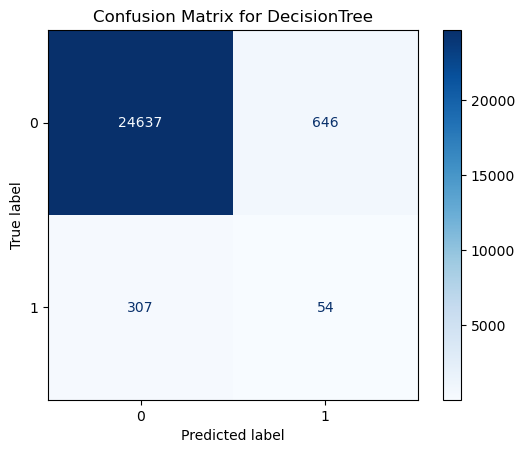

Generating Lift plot for DecisionTree...



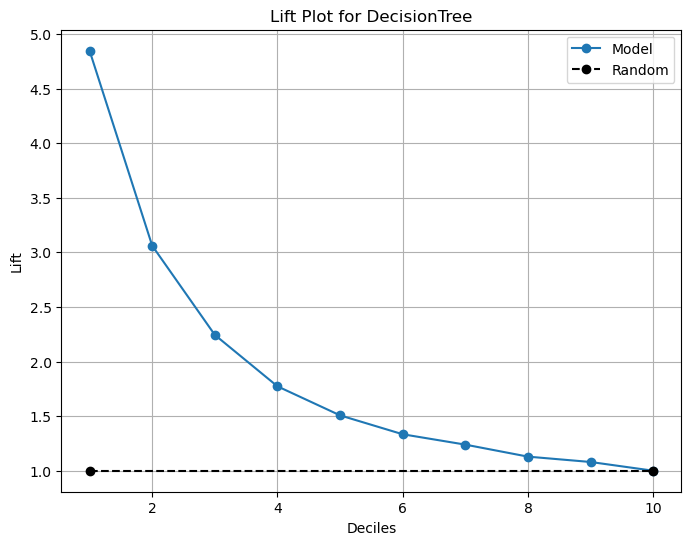

Generating Cumulative Gain plot for DecisionTree...



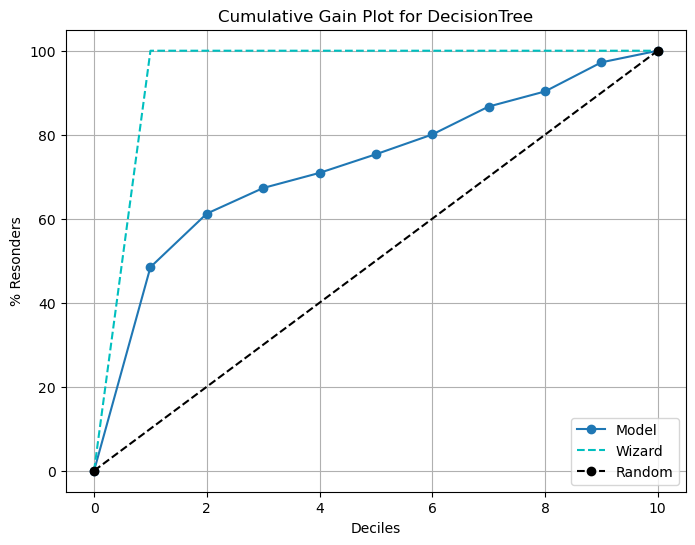


Evaluating LogisticRegression on the Test Set...

Test AUC for LogisticRegression: 0.6325121508183869
Confusion Matrix for LogisticRegression:
[[25282     1]
 [  361     0]]
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25283
           1       0.00      0.00      0.00       361

    accuracy                           0.99     25644
   macro avg       0.49      0.50      0.50     25644
weighted avg       0.97      0.99      0.98     25644



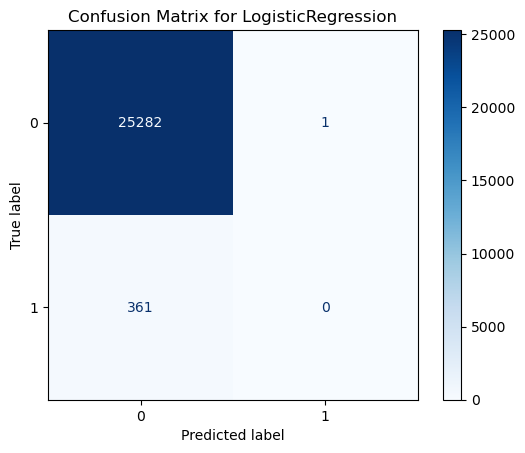

Generating Lift plot for LogisticRegression...



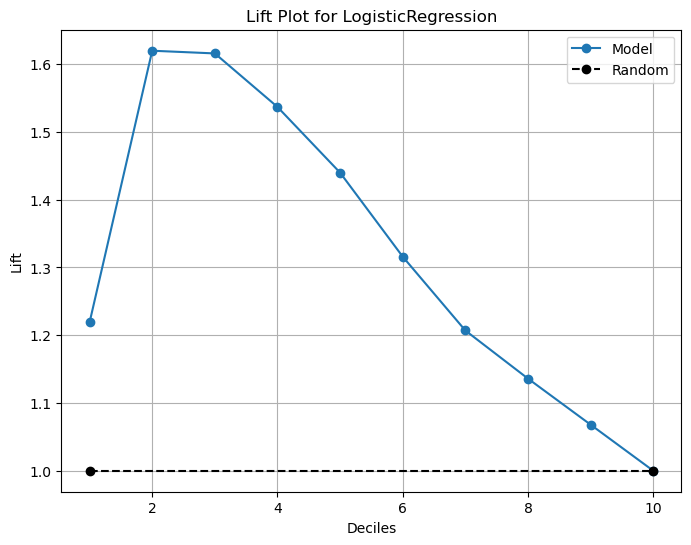

Generating Cumulative Gain plot for LogisticRegression...



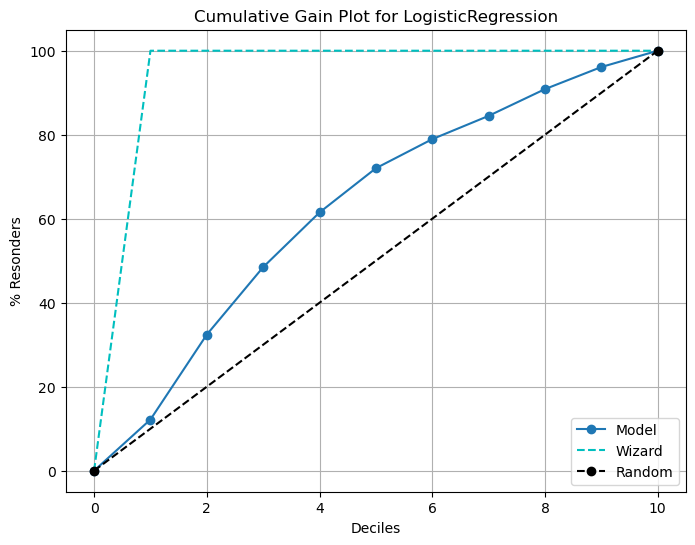


Evaluating RandomForest on the Test Set...

Test AUC for RandomForest: 0.7404564813841935
Confusion Matrix for RandomForest:
[[25281     2]
 [  360     1]]
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25283
           1       0.33      0.00      0.01       361

    accuracy                           0.99     25644
   macro avg       0.66      0.50      0.50     25644
weighted avg       0.98      0.99      0.98     25644



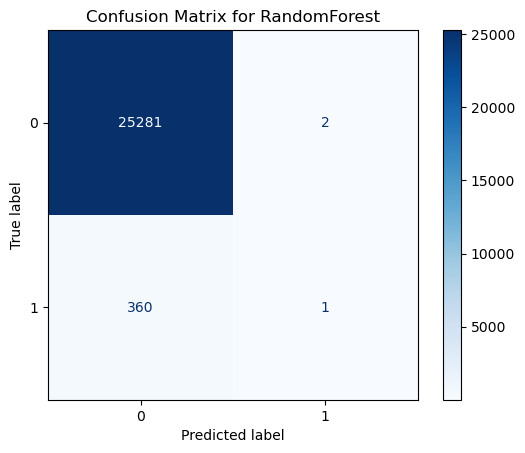

Generating Lift plot for RandomForest...



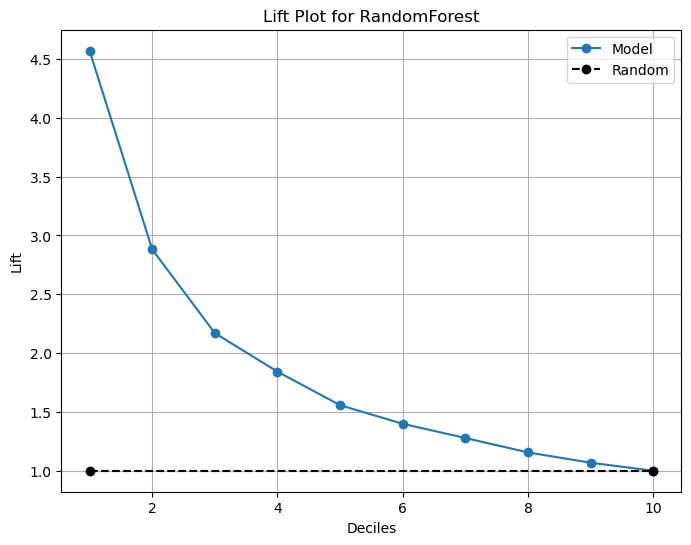

Generating Cumulative Gain plot for RandomForest...



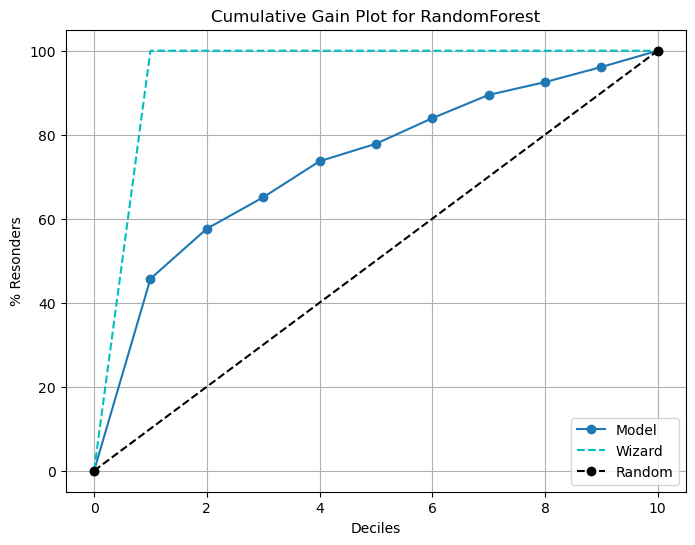


Evaluating GradientBoosting on the Test Set...

Test AUC for GradientBoosting: 0.7703832505237389
Confusion Matrix for GradientBoosting:
[[24386   897]
 [  281    80]]
Classification Report for GradientBoosting:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     25283
           1       0.08      0.22      0.12       361

    accuracy                           0.95     25644
   macro avg       0.54      0.59      0.55     25644
weighted avg       0.98      0.95      0.96     25644



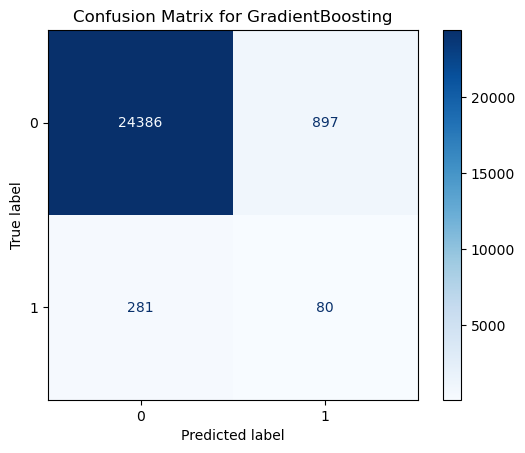

Generating Lift plot for GradientBoosting...



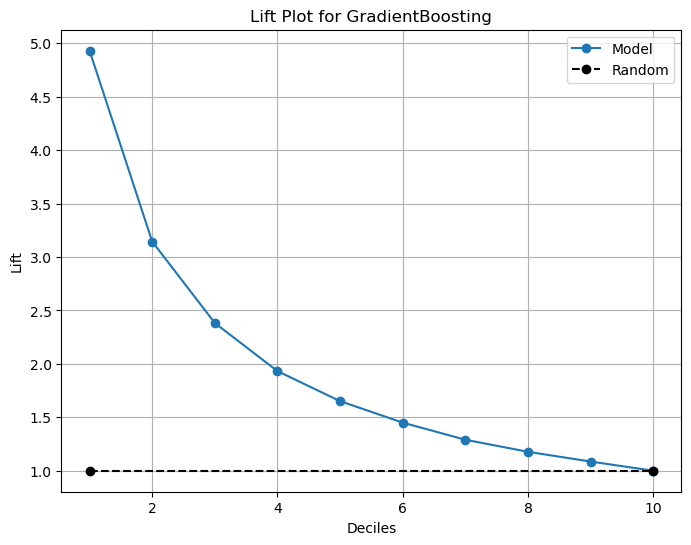

Generating Cumulative Gain plot for GradientBoosting...



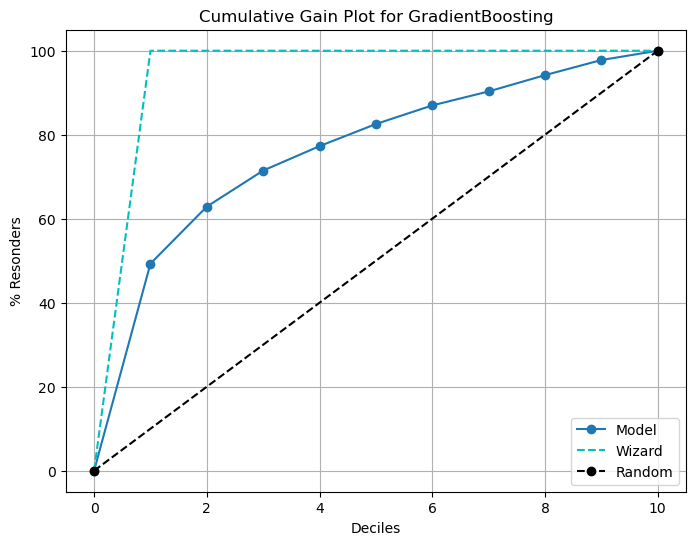


Evaluating KNearestNeighbors on the Test Set...

Test AUC for KNearestNeighbors: 0.5926596249020643
Confusion Matrix for KNearestNeighbors:
[[25279     4]
 [  360     1]]
Classification Report for KNearestNeighbors:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25283
           1       0.20      0.00      0.01       361

    accuracy                           0.99     25644
   macro avg       0.59      0.50      0.50     25644
weighted avg       0.97      0.99      0.98     25644



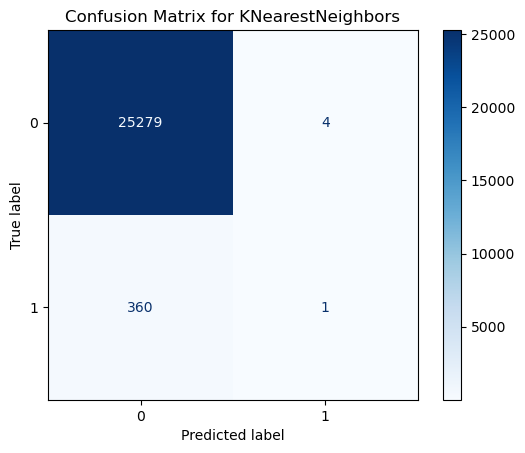

Generating Lift plot for KNearestNeighbors...



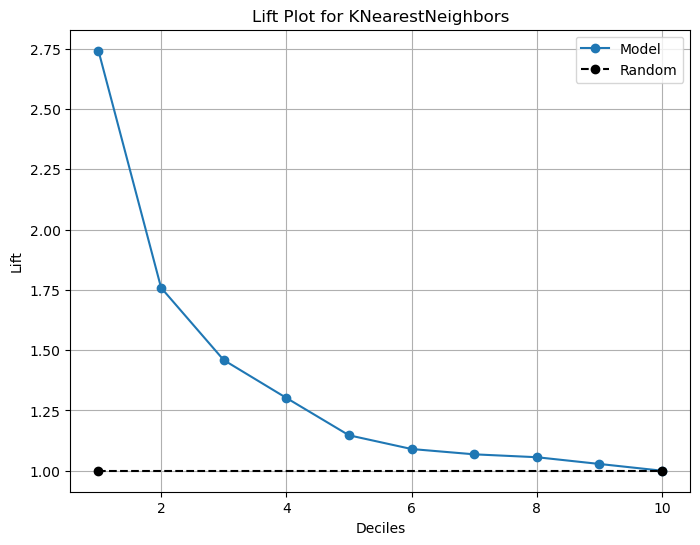

Generating Cumulative Gain plot for KNearestNeighbors...



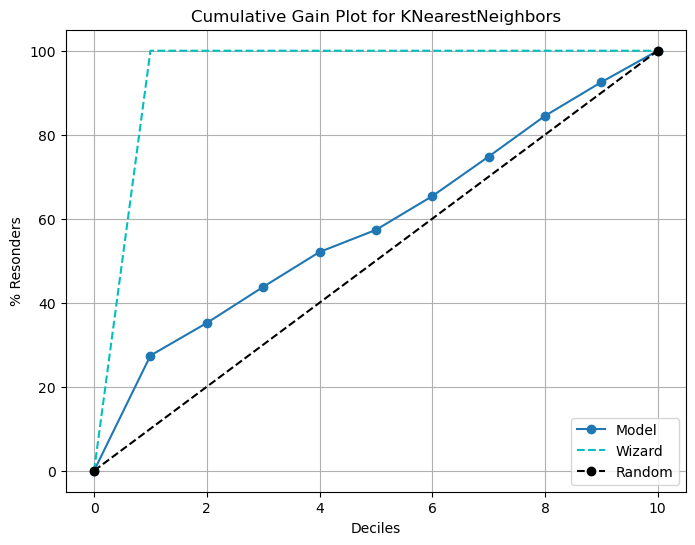

In [135]:
# Models to evaluate
model_classes = {
    "GradientBoosting": GradientBoostingClassifier,
    "RandomForest": RandomForestClassifier,
    'LogisticRegression': LogisticRegression,
    'KNearestNeighbors':KNeighborsClassifier,
    'DecisionTree': DecisionTreeClassifier
}

# Helper function to remove pipeline prefixes from parameters
def clean_params(params, prefix="classifier__"):
    return {k.replace(prefix, ""): v for k, v in params.items() if k.startswith(prefix)}

# Loop through results and evaluate models
for model_name, result in results.items():
    if model_name in model_classes.keys():
        print(f"\nEvaluating {model_name} on the Test Set...\n")

        # Retrieve the best hyperparameters and selected features
        best_params = result["best_params"]
        cleaned_params = clean_params(best_params)  # Remove pipeline prefixes
        selected_features = result["selected_features"]

        # Filter the test set using selected features
        X_test_selected = X_test[selected_features]

        # Rebuild the model with the cleaned parameters
        model_class = model_classes[model_name]
        best_model = model_class(**cleaned_params)

        # Refit the model on the entire training set (for final evaluation)
        X_train_selected = X_train[selected_features]
        best_model.fit(X_train_selected, y_train)

        # Predict probabilities for the positive class on the test set
        y_test_pred_prob = best_model.predict_proba(X_test_selected)[:, 1]

        # Calculate AUC score
        test_auc = roc_auc_score(y_test, y_test_pred_prob)
        print(f"Test AUC for {model_name}: {test_auc}")

        # Generate confusion matrix
        y_test_pred_class = best_model.predict(X_test_selected)
        cm = confusion_matrix(y_test, y_test_pred_class)
        print(f"Confusion Matrix for {model_name}:\n{cm}")

        # Display classification report
        print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_test_pred_class)}")

        # Plot the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap="Blues")
        plt.title(f"Confusion Matrix for {model_name}")
        plt.show()

        # LIFT PLOT
        print(f"Generating Lift plot for {model_name}...\n")

        # Prepare the dataset for plotting Lift curve
        testSet = X_test.copy()
        testSet["Donation"] = y_test
        testSet["proba Donation"] = y_test_pred_prob

        # Plot Lift
        plt.figure(figsize=(8, 6))
        kds.metrics.plot_lift(testSet["Donation"], testSet["proba Donation"])
        plt.title(f"Lift Plot for {model_name}")
        plt.show()

        # CUMULATIVE GAIN PLOT
        print(f"Generating Cumulative Gain plot for {model_name}...\n")

        # Plot Cumulative Gain
        plt.figure(figsize=(8, 6))
        kds.metrics.plot_cumulative_gain(testSet["Donation"], testSet["proba Donation"])
        plt.title(f"Cumulative Gain Plot for {model_name}")
        plt.show()


### WHICH IS THE BEST MODEL?

By analyzing the AUC score, Accuracy for the Test Set along with the Confusion Matrix, and most importanty the Cumulative Gain Plot, our decision stepped into the 'GRADIANT BOOSTING' Algorithm.


According to that model:
- In the first decile (top 10% of predictions), the model captures around 50% of responders, which is excellent.
- By the second decile, the model captures about 65% of responders, showcasing its strong ability to rank predictions effectively.
- The gap between the Model and Wizard curve indicates there is still room for improvement, but the model performs reasonably well.

## LAST CAMPAIGN - 7622

In [136]:
RESULT_campaigns=pd.read_csv(Data + r"\selection campaign 7662.csv", sep=';')

In [137]:
#Define the 'today' date
today_RESULT = datetime.strptime('01/01/2020', '%m/%d/%Y')
result_3y = datetime.strptime('01/01/2017', '%m/%d/%Y')

In [138]:
RESULT_campaigns

,donorID
0,D134242
1,D126503
2,D104392
3,D105905
4,D120506
...,...
26517,D114719
26518,D134824
26519,D143259
26520,D123936


Match the donors 

In [139]:
RESULT_set=donors[donors['donorID'].isin(RESULT_campaigns['donorID'])]
RESULT_set

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
2,D100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,D100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
5,D100006,1090.0,Brussels,Brussels,M,FR,06/01/1926
8,D100009,1020.0,Brussels,Brussels,M,FR,01/20/1932
...,...,...,...,...,...,...,...
44686,D144687,4900.0,Liege,Wallonia,M,FR,09/12/1970
44687,D144688,3600.0,Limburg,Flanders,M,NL,11/28/1972
44688,D144689,3061.0,Flemish Brabant,Flanders,M,NL,04/21/1967
44689,D144690,1950.0,Flemish Brabant,Flanders,M,FR,05/07/1976


Creating Features

In [140]:
RESULT_set['dateOfBirth']=pd.to_datetime(RESULT_set['dateOfBirth'])
#Computing the age and age group for the donors
# Ensure the dateOfBirth column is in datetime format
RESULT_set['dateOfBirth'] = pd.to_datetime(RESULT_set['dateOfBirth'], format='%m/%d/%Y')
# Compute the age and age group based on the specified date
RESULT_set['age'] = RESULT_set['dateOfBirth'].apply(lambda dob: today_RESULT.year - dob.year - ((today_RESULT.month, today_RESULT.day) < (dob.month, dob.day)))
RESULT_set['age_group']=(RESULT_set['age']//10)*10
#Drop Unnecessary columns
RESULT_set=RESULT_set.drop(columns=['dateOfBirth'])
# Display the donors table
RESULT_set

,donorID,zipcode,province,region,gender,language,age,age_group
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,52,50
2,D100003,1780.0,Flemish Brabant,Flanders,M,NL,33,30
3,D100004,1020.0,Brussels,Brussels,F,FR,67,60
5,D100006,1090.0,Brussels,Brussels,M,FR,93,90
8,D100009,1020.0,Brussels,Brussels,M,FR,87,80
...,...,...,...,...,...,...,...,...
44686,D144687,4900.0,Liege,Wallonia,M,FR,49,40
44687,D144688,3600.0,Limburg,Flanders,M,NL,47,40
44688,D144689,3061.0,Flemish Brabant,Flanders,M,NL,52,50
44689,D144690,1950.0,Flemish Brabant,Flanders,M,FR,43,40


In [141]:
## Investigating the number of missing values 
print(RESULT_set.isnull().sum())

donorID       0
zipcode       2
province      0
region        0
gender       23
language      0
age           0
age_group     0
dtype: int64


In [142]:
#Merge the modeGender of trainning set per province with the test dataset 'test_set'
RESULT_set=pd.merge(RESULT_set,modeGender,on='province',how='left')
#Fill missing values in 'gender' with the mode for each province
RESULT_set['gender']=RESULT_set['gender'].fillna(RESULT_set['gender_mode'])
#Dropping the gender_mode
RESULT_set=RESULT_set.drop(columns=['gender_mode'])

In [143]:
## Investigating the number of missing values 
print(RESULT_set.isnull().sum())

donorID      0
zipcode      2
province     0
region       0
gender       0
language     0
age          0
age_group    0
dtype: int64


In [144]:
# Compute the merge on donorID
merged_df_RESULT_test=pd.merge(gifts,RESULT_set,on='donorID')
# Rename columns to avoid complications
merged_df_RESULT_test = merged_df_RESULT_test.rename(columns={'date':'dateOfDonation'})
merged_df_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,age,age_group
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,52,50
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,52,50
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,52,50
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,52,50
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,52,50
...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,52,50
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,52,50
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,52,50
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,43,40


Merge the dataset with campaign 

In [145]:

donors_gift_campaign_RESULT_test=pd.merge(merged_df_RESULT_test,campaigns,on='campaignID', how='left')
donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,age,age_group,dateOfCampaign,lettersSent,CostUnit,TotalCost
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,52,50,NaT,NaN,NaN,NaN
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,52,50,2007-10-09,34636.0,0.31,10737.16
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,52,50,2007-12-08,34080.0,0.21,7156.80
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,52,50,2008-05-25,30558.0,0.41,12528.78
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,52,50,2008-06-22,39664.0,0.61,24195.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,52,50,2018-06-08,39445.0,0.30,11833.50
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,52,50,2019-04-26,28592.0,0.06,1715.52
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,52,50,2019-11-26,35199.0,0.36,12671.64
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,43,40,2014-12-25,37833.0,0.50,18916.50


In [146]:
# Group by DonorID
donors_gift_campaign_RESULT1 = donors_gift_campaign_RESULT_test[donors_gift_campaign_RESULT_test['dateOfDonation'] < today_RESULT]
donation_summary_RESULT = donors_gift_campaign_RESULT1.groupby('donorID').agg(
    first_donation=('dateOfDonation', 'min'),  
    last_donation=('dateOfDonation', 'max'),
    tot_amount=('amount','sum'),
    avg_amount=('amount','mean'),
    campaign_count=('campaignID','count'),
    max_amount=('amount','max'),
    min_amount=('amount','min'),
).reset_index()
 
donors_gift_campaign_RESULT_test = donors_gift_campaign_RESULT_test.merge(donation_summary_RESULT, on='donorID', how='left')

donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,lettersSent,CostUnit,TotalCost,first_donation,last_donation,tot_amount,avg_amount,campaign_count,max_amount,min_amount
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,NaN,NaN,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,34636.0,0.31,10737.16,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,34080.0,0.21,7156.80,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30558.0,0.41,12528.78,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,39664.0,0.61,24195.04,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,39445.0,0.30,11833.50,2005-07-22,2019-12-06,424.79,106.197500,4,200.0,24.79
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,28592.0,0.06,1715.52,2005-07-22,2019-12-06,424.79,106.197500,4,200.0,24.79
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,35199.0,0.36,12671.64,2005-07-22,2019-12-06,424.79,106.197500,4,200.0,24.79
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,37833.0,0.50,18916.50,2014-12-30,2014-12-30,40.00,40.000000,1,40.0,40.00


LOR

In [147]:
# Ensure the first_donation column is in datetime format
donors_gift_campaign_RESULT_test['first_donation'] = pd.to_datetime(donors_gift_campaign_RESULT_test['first_donation'], format='%m/%d/%Y')

# Calculate Length of Relationship (LOR) in years
donors_gift_campaign_RESULT_test['LOR_days'] = (today_RESULT - donors_gift_campaign_RESULT_test['first_donation']).dt.days
donors_gift_campaign_RESULT_test['LOR_years'] = (donors_gift_campaign_RESULT_test['LOR_days'] / 365.25).round(1)  # Round to 1 decimal place
# Drop the LOR_days column if not needed
donors_gift_campaign_RESULT_test.drop('LOR_days', axis=1, inplace=True)
# Display the updated dataset
donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,CostUnit,TotalCost,first_donation,last_donation,tot_amount,avg_amount,campaign_count,max_amount,min_amount,LOR_years
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,NaN,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,0.31,10737.16,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,0.21,7156.80,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,0.41,12528.78,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,0.61,24195.04,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,0.30,11833.50,2005-07-22,2019-12-06,424.79,106.197500,4,200.0,24.79,14.4
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,0.06,1715.52,2005-07-22,2019-12-06,424.79,106.197500,4,200.0,24.79,14.4
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,0.36,12671.64,2005-07-22,2019-12-06,424.79,106.197500,4,200.0,24.79,14.4
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,0.50,18916.50,2014-12-30,2014-12-30,40.00,40.000000,1,40.0,40.00,5.0


RECENCY

In [148]:
# Ensure the first_donation column is in datetime format
donors_gift_campaign_RESULT_test['last_donation'] = pd.to_datetime(donors_gift_campaign_RESULT_test['last_donation'], format='%m/%d/%Y')

# Calculate Length of Relationship (LOR) in years
donors_gift_campaign_RESULT_test['Recency_days'] = (today_RESULT - donors_gift_campaign_RESULT_test['last_donation']).dt.days
donors_gift_campaign_RESULT_test['Recency_years'] = (donors_gift_campaign_RESULT_test['Recency_days'] / 365.25).round(1)  # Round to 1 decimal place
# Drop the LOR_days column if not needed
donors_gift_campaign_RESULT_test.drop('Recency_days', axis=1, inplace=True)
# Display the updated dataset
donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,TotalCost,first_donation,last_donation,tot_amount,avg_amount,campaign_count,max_amount,min_amount,LOR_years,Recency_years
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8,8.0
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,10737.16,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8,8.0
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7156.80,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8,8.0
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,12528.78,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8,8.0
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,24195.04,2004-03-23,2011-12-30,178.49,14.874167,12,30.0,6.69,15.8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,11833.50,2005-07-22,2019-12-06,424.79,106.197500,4,200.0,24.79,14.4,0.1
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,1715.52,2005-07-22,2019-12-06,424.79,106.197500,4,200.0,24.79,14.4,0.1
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,12671.64,2005-07-22,2019-12-06,424.79,106.197500,4,200.0,24.79,14.4,0.1
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,18916.50,2014-12-30,2014-12-30,40.00,40.000000,1,40.0,40.00,5.0,5.0


FREQUENCY

In [149]:
donors_gift_campaign_RESULT_test['Frequency']=donors_gift_campaign_RESULT_test['campaign_count']
donors_gift_campaign_RESULT_test = donors_gift_campaign_RESULT_test.drop(columns=['campaign_count'])

MONETARY VALUE

In [150]:
donors_gift_campaign_RESULT_test['Monetary_Value']=donors_gift_campaign_RESULT_test['tot_amount']
donors_gift_campaign_RESULT_test = donors_gift_campaign_RESULT_test.drop(columns=['tot_amount'])
donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,TotalCost,first_donation,last_donation,avg_amount,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,10737.16,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7156.80,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,12528.78,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,24195.04,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,11833.50,2005-07-22,2019-12-06,106.197500,200.0,24.79,14.4,0.1,4,424.79
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,1715.52,2005-07-22,2019-12-06,106.197500,200.0,24.79,14.4,0.1,4,424.79
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,12671.64,2005-07-22,2019-12-06,106.197500,200.0,24.79,14.4,0.1,4,424.79
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,18916.50,2014-12-30,2014-12-30,40.000000,40.0,40.00,5.0,5.0,1,40.00


AVERAGE DONATION PER YEAR

In [151]:
donors_gift_campaign_RESULT_test['avg_donation_per_year']=(donors_gift_campaign_RESULT_test["Frequency"]/donors_gift_campaign_RESULT_test['LOR_years']).round(2)
donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,first_donation,last_donation,avg_amount,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value,avg_donation_per_year
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,2004-03-23,2011-12-30,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,2005-07-22,2019-12-06,106.197500,200.0,24.79,14.4,0.1,4,424.79,0.28
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,2005-07-22,2019-12-06,106.197500,200.0,24.79,14.4,0.1,4,424.79,0.28
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,2005-07-22,2019-12-06,106.197500,200.0,24.79,14.4,0.1,4,424.79,0.28
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,2014-12-30,2014-12-30,40.000000,40.0,40.00,5.0,5.0,1,40.00,0.20


DONOR LIFETIME

In [152]:
donors_gift_campaign_RESULT_test['Donor_lifetime_days'] = (donors_gift_campaign_RESULT_test['last_donation']-donors_gift_campaign_RESULT_test['first_donation']).dt.days
donors_gift_campaign_RESULT_test['Donor_lifetime_years'] = (donors_gift_campaign_RESULT_test['Donor_lifetime_days'] / 365.25).round(1)
donors_gift_campaign_RESULT_test = donors_gift_campaign_RESULT_test.drop(columns=['Donor_lifetime_days'])
donors_gift_campaign_RESULT_test = donors_gift_campaign_RESULT_test.drop(columns=['first_donation','last_donation'])
donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,TotalCost,avg_amount,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value,avg_donation_per_year,Donor_lifetime_years
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,NaN,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,10737.16,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7156.80,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,12528.78,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,24195.04,14.874167,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,11833.50,106.197500,200.0,24.79,14.4,0.1,4,424.79,0.28,14.4
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,1715.52,106.197500,200.0,24.79,14.4,0.1,4,424.79,0.28,14.4
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,12671.64,106.197500,200.0,24.79,14.4,0.1,4,424.79,0.28,14.4
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,18916.50,40.000000,40.0,40.00,5.0,5.0,1,40.00,0.20,0.0


AVERAGE TIME BETWEEN DONATIONS

In [153]:
donors_gift_campaign_RESULT_test = donors_gift_campaign_RESULT_test.sort_values(by=['donorID', 'dateOfDonation'])

donors_gift_campaign_RESULT_test['time_diff_months'] = donors_gift_campaign_RESULT_test.groupby('donorID')['dateOfDonation'].diff().dt.days / 30.0
avg_time_between_donations_RESULT_test = donors_gift_campaign_RESULT_test.groupby('donorID')['time_diff_months'].mean().reset_index()
avg_time_between_donations_RESULT_test.rename(columns={'time_diff_months': 'avg_time_between_donations'}, inplace=True)
donors_gift_campaign_RESULT_test = donors_gift_campaign_RESULT_test.merge(avg_time_between_donations_RESULT_test, on='donorID', how='left')

donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,max_amount,min_amount,LOR_years,Recency_years,Frequency,Monetary_Value,avg_donation_per_year,Donor_lifetime_years,time_diff_months,avg_time_between_donations
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8,NaN,8.600000
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8,43.233333,8.600000
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8,2.600000,8.600000
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8,5.633333,8.600000
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,30.0,6.69,15.8,8.0,12,178.49,0.76,7.8,0.833333,8.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,200.0,24.79,14.4,0.1,4,424.79,0.28,14.4,157.366667,58.333333
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,200.0,24.79,14.4,0.1,4,424.79,0.28,14.4,10.333333,58.333333
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,200.0,24.79,14.4,0.1,4,424.79,0.28,14.4,7.300000,58.333333
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,40.0,40.00,5.0,5.0,1,40.00,0.20,0.0,NaN,NaN


Variables for the last n years

In [154]:
n= 1
date_limit_RESULT = today_RESULT - timedelta(days=365 * n)
donors_gift_campaign_RESULT_test2=donors_gift_campaign_RESULT_test[(donors_gift_campaign_RESULT_test['dateOfDonation']>=date_limit_RESULT)
&(donors_gift_campaign_RESULT_test['dateOfDonation']<= today_RESULT)]
 
donation_summary_RESULTn = donors_gift_campaign_RESULT_test2.groupby('donorID').agg(
    tot_amount_n=('amount','sum'),
    avg_amount_n=('amount','mean'),
    campaign_count_n=('campaignID','count'),
    max_amount_n=('amount','max'),
    min_amount_n=('amount','min'),

).reset_index()


donors_gift_campaign_RESULT_test = donors_gift_campaign_RESULT_test.merge(donation_summary_RESULTn, on='donorID', how='left')

donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,Monetary_Value,avg_donation_per_year,Donor_lifetime_years,time_diff_months,avg_time_between_donations,tot_amount_n,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.76,7.8,NaN,8.600000,NaN,NaN,NaN,NaN,NaN
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.76,7.8,43.233333,8.600000,NaN,NaN,NaN,NaN,NaN
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.76,7.8,2.600000,8.600000,NaN,NaN,NaN,NaN,NaN
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.76,7.8,5.633333,8.600000,NaN,NaN,NaN,NaN,NaN
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,178.49,0.76,7.8,0.833333,8.600000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,424.79,0.28,14.4,157.366667,58.333333,300.0,150.0,2.0,200.0,100.0
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,424.79,0.28,14.4,10.333333,58.333333,300.0,150.0,2.0,200.0,100.0
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,424.79,0.28,14.4,7.300000,58.333333,300.0,150.0,2.0,200.0,100.0
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,40.00,0.20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MOST FREQUENT MONTH

In [155]:
donors_gift_campaign_RESULT_test['month'] = donors_gift_campaign_RESULT_test['dateOfDonation'].dt.month


# Group by donor and month to calculate total donations per month
donations_per_month_result = donors_gift_campaign_RESULT_test.groupby(['donorID', 'month'])['amount'].sum().reset_index()

# Find the month with the highest donations for each donor
most_frequent_month_result = donations_per_month_result.loc[donations_per_month_result.groupby('donorID')['amount'].idxmax()]

# Rename columns for clarity
most_frequent_month_result = most_frequent_month_result.rename(columns={'amount': 'total_donated', 'month': 'most_frequent_month'})

# Merge the most frequent month back to the original DataFrame
donors_gift_campaign_RESULT_test = pd.merge(donors_gift_campaign_RESULT_test, most_frequent_month_result[['donorID', 'most_frequent_month']], on='donorID', how='left')
donors_gift_campaign_RESULT_test

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,Donor_lifetime_years,time_diff_months,avg_time_between_donations,tot_amount_n,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n,month,most_frequent_month
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,NaN,8.600000,NaN,NaN,NaN,NaN,NaN,3,12
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,43.233333,8.600000,NaN,NaN,NaN,NaN,NaN,10,12
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,2.600000,8.600000,NaN,NaN,NaN,NaN,NaN,12,12
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,5.633333,8.600000,NaN,NaN,NaN,NaN,NaN,6,12
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,0.833333,8.600000,NaN,NaN,NaN,NaN,NaN,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,14.4,157.366667,58.333333,300.0,150.0,2.0,200.0,100.0,6,12
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,14.4,10.333333,58.333333,300.0,150.0,2.0,200.0,100.0,5,12
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,14.4,7.300000,58.333333,300.0,150.0,2.0,200.0,100.0,12,12
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12


In [156]:
# Aggregating by 'donorID'
RESULT_set=donors_gift_campaign_RESULT_test[donors_gift_campaign_RESULT_test['dateOfDonation']<today_RESULT]
RESULT_set

,donorID,campaignID,amount,dateOfDonation,time_diff,zipcode,province,region,gender,language,...,Donor_lifetime_years,time_diff_months,avg_time_between_donations,tot_amount_n,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n,month,most_frequent_month
0,D100001,0.0,12.39,2004-03-23,NaN,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,NaN,8.600000,NaN,NaN,NaN,NaN,NaN,3,12
1,D100001,1577.0,12.39,2007-10-11,1297.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,43.233333,8.600000,NaN,NaN,NaN,NaN,NaN,10,12
2,D100001,1634.0,6.69,2007-12-28,78.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,2.600000,8.600000,NaN,NaN,NaN,NaN,NaN,12,12
3,D100001,1778.0,24.79,2008-06-14,169.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,5.633333,8.600000,NaN,NaN,NaN,NaN,NaN,6,12
4,D100001,1808.0,7.44,2008-07-09,25.0,1861.0,Flemish Brabant,Flanders,F,NL,...,7.8,0.833333,8.600000,NaN,NaN,NaN,NaN,NaN,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129694,D144689,5326.0,100.00,2018-06-25,4721.0,3061.0,Flemish Brabant,Flanders,M,NL,...,14.4,157.366667,58.333333,300.0,150.0,2.0,200.0,100.0,6,12
129695,D144689,7212.0,100.00,2019-05-01,310.0,3061.0,Flemish Brabant,Flanders,M,NL,...,14.4,10.333333,58.333333,300.0,150.0,2.0,200.0,100.0,5,12
129696,D144689,7519.0,200.00,2019-12-06,219.0,3061.0,Flemish Brabant,Flanders,M,NL,...,14.4,7.300000,58.333333,300.0,150.0,2.0,200.0,100.0,12,12
129697,D144690,3941.0,40.00,2014-12-30,NaN,1950.0,Flemish Brabant,Flanders,M,FR,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12


In [157]:
RESULT_set.fillna(0, inplace=True)

Group by

In [158]:
RESULT_set=RESULT_set.groupby(['donorID','zipcode','province','region','gender','age','age_group','language','Donor_lifetime_years', 'avg_amount','max_amount',
'min_amount','LOR_years','Recency_years','Frequency','Monetary_Value','avg_donation_per_year', 'tot_amount_n',	'avg_amount_n',	'campaign_count_n',	'max_amount_n'	,'min_amount_n', 'most_frequent_month']).agg(
    tot_amount_3y=('amount','sum'),
    avg_amount_3y=('amount','mean'),
    campaign_count_3y=('campaignID','count'),
    lettersSent=('lettersSent','mean'),
    CostUnit=('CostUnit','mean')
).reset_index()
RESULT_set

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,avg_amount_n,campaign_count_n,max_amount_n,min_amount_n,most_frequent_month,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit
0,D100001,1861.0,Flemish Brabant,Flanders,F,52,50,NL,7.8,14.874167,...,0.0,0.0,0.0,0.0,12,178.49,14.874167,12,30137.666667,0.307500
1,D100003,1780.0,Flemish Brabant,Flanders,M,33,30,NL,1.9,3.833333,...,4.0,5.0,4.0,4.0,3,46.00,3.833333,12,31122.166667,0.176667
2,D100004,1020.0,Brussels,Brussels,F,67,60,FR,5.9,27.546923,...,0.0,0.0,0.0,0.0,12,716.22,27.546923,26,32142.538462,0.293462
3,D100006,1090.0,Brussels,Brussels,M,93,90,FR,0.0,5.000000,...,0.0,0.0,0.0,0.0,8,5.00,5.000000,1,28955.000000,0.190000
4,D100009,1020.0,Brussels,Brussels,M,87,80,FR,6.2,17.198947,...,0.0,0.0,0.0,0.0,4,326.78,17.198947,19,34788.105263,0.433158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26503,D144687,4900.0,Liege,Wallonia,M,49,40,FR,0.0,10.000000,...,0.0,0.0,0.0,0.0,11,10.00,10.000000,1,24753.000000,0.200000
26504,D144688,3600.0,Limburg,Flanders,M,47,40,NL,9.4,6.937143,...,0.0,0.0,0.0,0.0,7,48.56,6.937143,7,33999.428571,0.292857
26505,D144689,3061.0,Flemish Brabant,Flanders,M,52,50,NL,14.4,106.197500,...,150.0,2.0,200.0,100.0,12,424.79,106.197500,4,32046.500000,0.215000
26506,D144690,1950.0,Flemish Brabant,Flanders,M,43,40,FR,0.0,40.000000,...,0.0,0.0,0.0,0.0,12,40.00,40.000000,1,37833.000000,0.500000


#### VISUALIZATION ABOUT THE DONORS

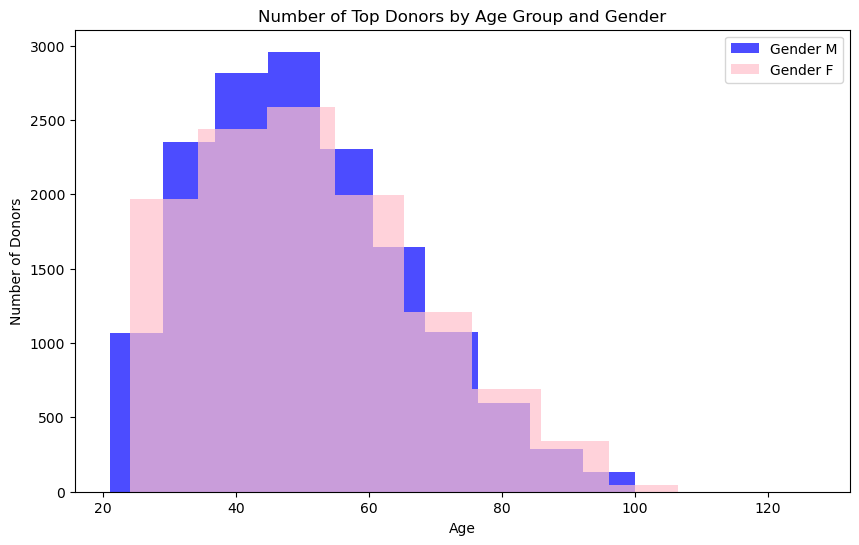

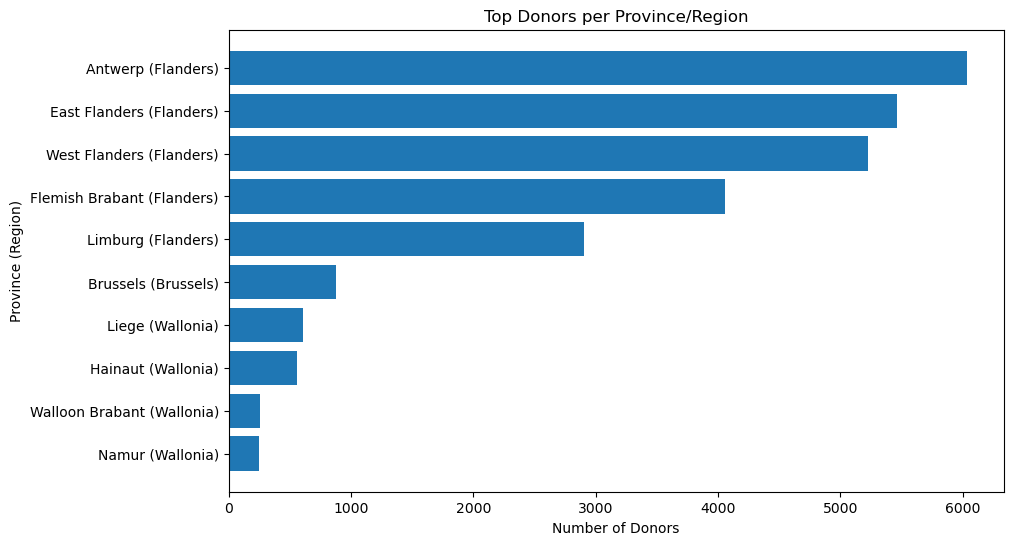

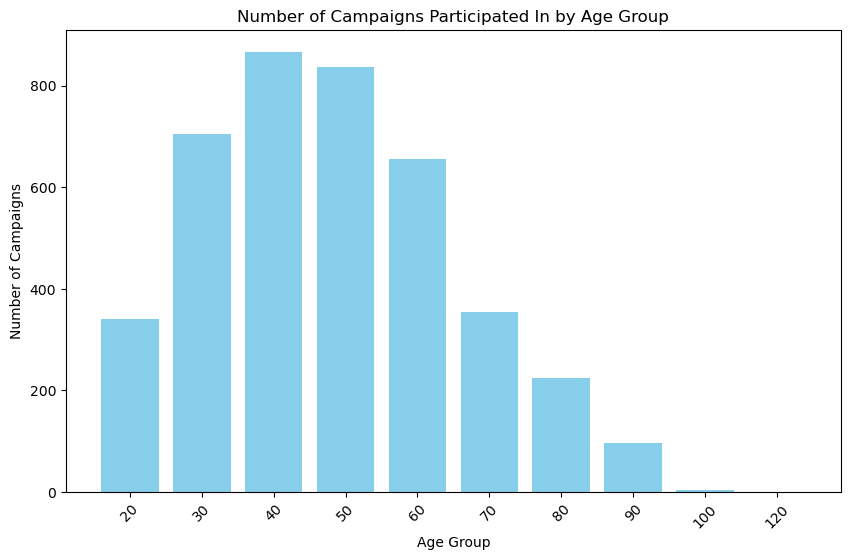

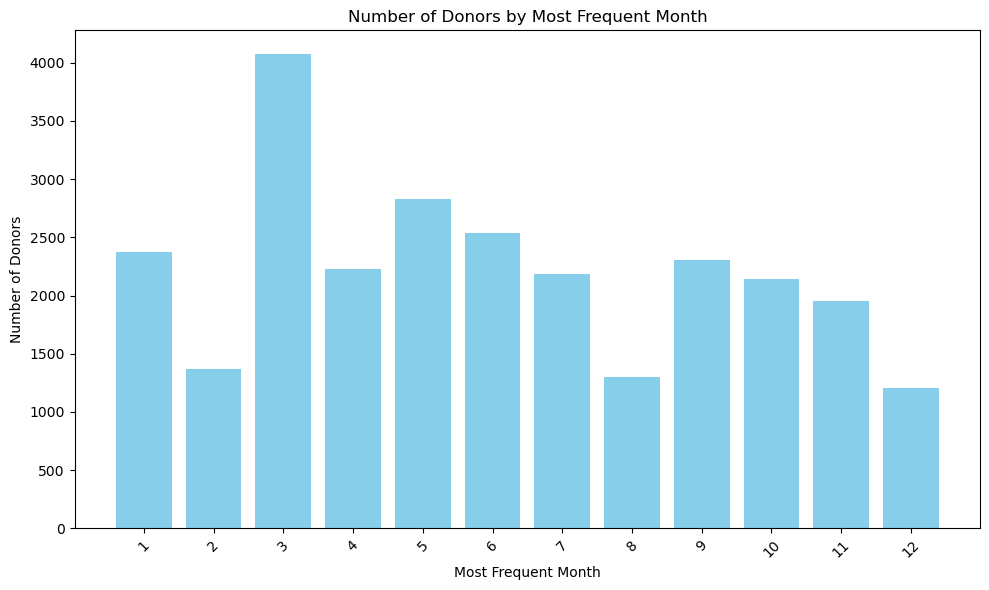

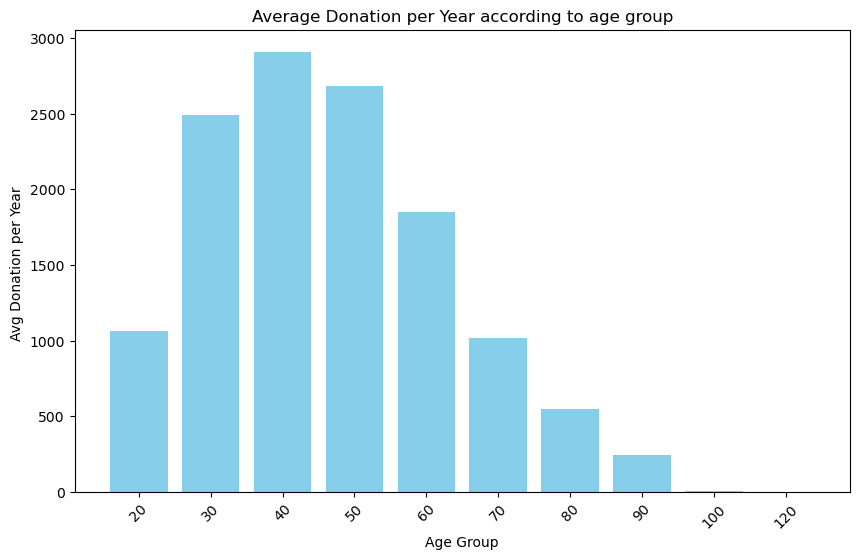

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named RESULT_set
# Example: RESULT_set = pd.read_csv("your_dataset.csv")

# 1. Top Number of Donors by Age Group and Gender (Histogram)
plt.figure(figsize=(10, 6))
for gender, color in zip(['M', 'F'], ['blue', 'pink']):
    data = RESULT_set[RESULT_set['gender'] == gender]
    plt.hist(data['age'], bins=10, alpha=0.7, label=f'Gender {gender}', color=color)

plt.title('Number of Top Donors by Age Group and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Donors')
plt.legend()
plt.show()

# 2. Top Donors per Province/Region
top_donors_province = RESULT_set.groupby(['province', 'region'])['donorID'].count().reset_index()
top_donors_province = top_donors_province.sort_values(by='donorID', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_donors_province['province'] + ' (' + top_donors_province['region'] + ')', top_donors_province['donorID'])
plt.title('Top Donors per Province/Region')
plt.xlabel('Number of Donors')
plt.ylabel('Province (Region)')
plt.gca().invert_yaxis()
plt.show()

# 3. Number of Campaigns Participated In Based on Age Group
campaigns_by_age = RESULT_set.groupby('age_group')['campaign_count_n'].sum().reset_index()
campaigns_by_age = campaigns_by_age.sort_values(by='age_group', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(campaigns_by_age['age_group'].astype(str), campaigns_by_age['campaign_count_n'], color='skyblue')
plt.title('Number of Campaigns Participated In by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.show()

# 4. Number of Donors by Most Frequent Month
grouped_data = RESULT_set.groupby('most_frequent_month')['donorID'].count().reset_index()
grouped_data = grouped_data.sort_values(by='most_frequent_month', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['most_frequent_month'].astype(str), grouped_data['donorID'], color='skyblue')
plt.title('Number of Donors by Most Frequent Month')
plt.xlabel('Most Frequent Month')
plt.ylabel('Number of Donors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Average Donation per Year according to age group
DOnorlifetime = RESULT_set.groupby('age_group')['avg_donation_per_year'].sum().reset_index()
DOnorlifetime = DOnorlifetime.sort_values(by='age_group', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(DOnorlifetime['age_group'].astype(str), DOnorlifetime['avg_donation_per_year'], color='skyblue')
plt.title('Average Donation per Year according to age group')
plt.xlabel('Age Group')
plt.ylabel('Avg Donation per Year ')
plt.xticks(rotation=45)
plt.show()

Create other features based on the GDP per Capita of 2019.

In [160]:
gdp_pc_province_2019=pd.read_csv(Data + r"/GDP_per_province_2019.csv", sep=',')
gdp_pc_province_2019

,province,GDP,Population,GDP per Capita
0,Antwerp,98189000000,1857986.00,52847.01
1,Brussels,90459000000,1208542.00,74849.69
2,East Flanders,62123000000,1515064.00,41003.55
3,Flemish Brabant,51731000000,1146175.00,45133.60
4,Hainaut,36940000000,1344241.00,27480.19
5,Liege,34715000000,1106992.00,31359.76
6,Limburg,31766000000,874048.00,36343.54
7,Luxembourg,7887000000,284638.00,27708.88
8,Missing,45635000000,1039218.73,43912.80
9,Namur,14697000000,494325.00,29731.45


In [161]:
print(gdp_pc_province_2019.dtypes)
print(gdp_pc_province_2019.describe())

province           object
GDP                 int64
Population        float64
GDP per Capita    float64
dtype: object
                GDP    Population  GDP per Capita
count  1.200000e+01  1.200000e+01       12.000000
mean   4.563500e+10  1.039219e+06    42211.845833
std    2.778718e+10  4.628628e+05    13594.967327
min    7.887000e+09  2.846380e+05    27480.190000
25%    2.911325e+10  7.791172e+05    30952.682500
50%    4.128750e+10  1.126584e+06    42379.670000
75%    5.477300e+10  1.242467e+06    46954.172500
max    9.818900e+10  1.857986e+06    74849.690000


Categorize

In [162]:
# Define thresholds based on percentiles
low_threshold = gdp_pc_province_2019["GDP per Capita"].quantile(0.33)
high_threshold = gdp_pc_province_2019["GDP per Capita"].quantile(0.67)

# Categorize regions
def categorize_gdp_per_capita(gdp_per_capita):
    if gdp_per_capita < low_threshold:
        return "Low"
    elif gdp_per_capita < high_threshold:
        return "Medium"
    else:
        return "High"

# Apply categorization
gdp_pc_province_2019["Category"] = gdp_pc_province_2019["GDP per Capita"].apply(categorize_gdp_per_capita)

gdp_pc_province_2019

,province,GDP,Population,GDP per Capita,Category
0,Antwerp,98189000000,1857986.00,52847.01,High
1,Brussels,90459000000,1208542.00,74849.69,High
2,East Flanders,62123000000,1515064.00,41003.55,Medium
3,Flemish Brabant,51731000000,1146175.00,45133.60,High
4,Hainaut,36940000000,1344241.00,27480.19,Low
5,Liege,34715000000,1106992.00,31359.76,Low
6,Limburg,31766000000,874048.00,36343.54,Medium
7,Luxembourg,7887000000,284638.00,27708.88,Low
8,Missing,45635000000,1039218.73,43912.80,Medium
9,Namur,14697000000,494325.00,29731.45,Low


MERGE THEM

In [163]:
RESULT_set=pd.merge(RESULT_set,gdp_pc_province_2019,on='province',how='left')
RESULT_set

,donorID,zipcode,province,region,gender,age,age_group,language,Donor_lifetime_years,avg_amount,...,most_frequent_month,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,GDP,Population,GDP per Capita,Category
0,D100001,1861.0,Flemish Brabant,Flanders,F,52,50,NL,7.8,14.874167,...,12,178.49,14.874167,12,30137.666667,0.307500,5.173100e+10,1146175.0,45133.60,High
1,D100003,1780.0,Flemish Brabant,Flanders,M,33,30,NL,1.9,3.833333,...,3,46.00,3.833333,12,31122.166667,0.176667,5.173100e+10,1146175.0,45133.60,High
2,D100004,1020.0,Brussels,Brussels,F,67,60,FR,5.9,27.546923,...,12,716.22,27.546923,26,32142.538462,0.293462,9.045900e+10,1208542.0,74849.69,High
3,D100006,1090.0,Brussels,Brussels,M,93,90,FR,0.0,5.000000,...,8,5.00,5.000000,1,28955.000000,0.190000,9.045900e+10,1208542.0,74849.69,High
4,D100009,1020.0,Brussels,Brussels,M,87,80,FR,6.2,17.198947,...,4,326.78,17.198947,19,34788.105263,0.433158,9.045900e+10,1208542.0,74849.69,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26503,D144687,4900.0,Liege,Wallonia,M,49,40,FR,0.0,10.000000,...,11,10.00,10.000000,1,24753.000000,0.200000,3.471500e+10,1106992.0,31359.76,Low
26504,D144688,3600.0,Limburg,Flanders,M,47,40,NL,9.4,6.937143,...,7,48.56,6.937143,7,33999.428571,0.292857,3.176600e+10,874048.0,36343.54,Medium
26505,D144689,3061.0,Flemish Brabant,Flanders,M,52,50,NL,14.4,106.197500,...,12,424.79,106.197500,4,32046.500000,0.215000,5.173100e+10,1146175.0,45133.60,High
26506,D144690,1950.0,Flemish Brabant,Flanders,M,43,40,FR,0.0,40.000000,...,12,40.00,40.000000,1,37833.000000,0.500000,5.173100e+10,1146175.0,45133.60,High


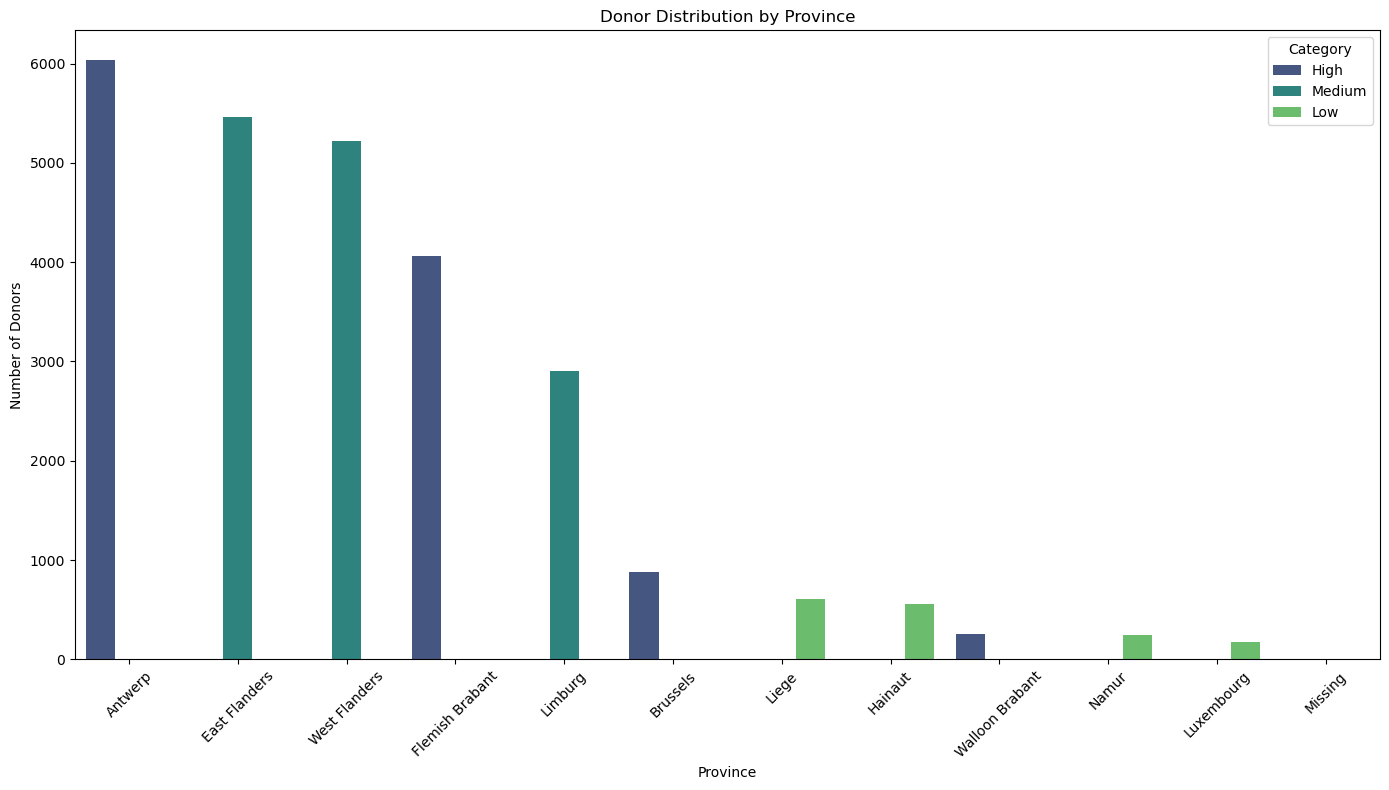

In [164]:
# 5. Donor Distribution by Province and Category
donor_distribution = RESULT_set.groupby(['province', 'Category'])['donorID'].count().reset_index()
donor_distribution = donor_distribution.sort_values(by='donorID', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='province', y='donorID', hue='Category', data=donor_distribution, palette='viridis')
plt.title('Donor Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Number of Donors')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## One Hot Encoding for the Features of the Result Set

GENDER

In [165]:
RESULT_set = RESULT_set.join(get_dummies(RESULT_set["gender"], prefix = "fl_gender_is", drop_first = True))


#We want to have binary values for each feature (1/0).

RESULT_set = RESULT_set.replace(True, 1)
RESULT_set = RESULT_set.replace(False, 0)
RESULT_set = RESULT_set.drop(columns=['gender'])
RESULT_set

,donorID,zipcode,province,region,age,age_group,language,Donor_lifetime_years,avg_amount,max_amount,...,tot_amount_3y,avg_amount_3y,campaign_count_3y,lettersSent,CostUnit,GDP,Population,GDP per Capita,Category,fl_gender_is_M
0,D100001,1861.0,Flemish Brabant,Flanders,52,50,NL,7.8,14.874167,30.00,...,178.49,14.874167,12,30137.666667,0.307500,5.173100e+10,1146175.0,45133.60,High,0
1,D100003,1780.0,Flemish Brabant,Flanders,33,30,NL,1.9,3.833333,5.00,...,46.00,3.833333,12,31122.166667,0.176667,5.173100e+10,1146175.0,45133.60,High,1
2,D100004,1020.0,Brussels,Brussels,67,60,FR,5.9,27.546923,49.58,...,716.22,27.546923,26,32142.538462,0.293462,9.045900e+10,1208542.0,74849.69,High,0
3,D100006,1090.0,Brussels,Brussels,93,90,FR,0.0,5.000000,5.00,...,5.00,5.000000,1,28955.000000,0.190000,9.045900e+10,1208542.0,74849.69,High,1
4,D100009,1020.0,Brussels,Brussels,87,80,FR,6.2,17.198947,25.00,...,326.78,17.198947,19,34788.105263,0.433158,9.045900e+10,1208542.0,74849.69,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26503,D144687,4900.0,Liege,Wallonia,49,40,FR,0.0,10.000000,10.00,...,10.00,10.000000,1,24753.000000,0.200000,3.471500e+10,1106992.0,31359.76,Low,1
26504,D144688,3600.0,Limburg,Flanders,47,40,NL,9.4,6.937143,15.00,...,48.56,6.937143,7,33999.428571,0.292857,3.176600e+10,874048.0,36343.54,Medium,1
26505,D144689,3061.0,Flemish Brabant,Flanders,52,50,NL,14.4,106.197500,200.00,...,424.79,106.197500,4,32046.500000,0.215000,5.173100e+10,1146175.0,45133.60,High,1
26506,D144690,1950.0,Flemish Brabant,Flanders,43,40,FR,0.0,40.000000,40.00,...,40.00,40.000000,1,37833.000000,0.500000,5.173100e+10,1146175.0,45133.60,High,1


REGION

In [166]:
RESULT_set = RESULT_set.join(get_dummies(RESULT_set["region"], prefix = "fl_region_is", drop_first = True))
RESULT_set = RESULT_set.replace(True, 1)
RESULT_set = RESULT_set.replace(False, 0)
RESULT_set = RESULT_set.drop(columns=['region'])

LANGUAGE

In [167]:
RESULT_set["fl_language_is_EN"] = (RESULT_set["language"] == "EN").astype(int)
RESULT_set["fl_language_is_NL"] = (RESULT_set["language"] == "NL").astype(int)
RESULT_set = RESULT_set.drop(columns=['language'])

PROVINCE

In [168]:
RESULT_set = RESULT_set.join(get_dummies(RESULT_set["province"], prefix = "fl_province_is", drop_first = True))
RESULT_set = RESULT_set.replace(True, 1)
RESULT_set = RESULT_set.replace(False, 0)
RESULT_set = RESULT_set.drop(columns=['province'])

LEVEL OF RICHNESS BY PROVINCE

In [169]:
RESULT_set = RESULT_set.join(get_dummies(RESULT_set["Category"], prefix = "fl_Category_is", drop_first = True))
RESULT_set = RESULT_set.replace(True, 1)
RESULT_set = RESULT_set.replace(False, 0)
RESULT_set = RESULT_set.drop(columns=['GDP','GDP per Capita','Category'])
RESULT_set

,donorID,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,...,fl_province_is_Hainaut,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium
0,D100001,1861.0,52,50,7.8,14.874167,30.00,6.69,15.8,8.0,...,0,0,0,0,0,0,0,0,0,0
1,D100003,1780.0,33,30,1.9,3.833333,5.00,3.00,2.4,0.5,...,0,0,0,0,0,0,0,0,0,0
2,D100004,1020.0,67,60,5.9,27.546923,49.58,24.79,14.5,8.6,...,0,0,0,0,0,0,0,0,0,0
3,D100006,1090.0,93,90,0.0,5.000000,5.00,5.00,2.4,2.4,...,0,0,0,0,0,0,0,0,0,0
4,D100009,1020.0,87,80,6.2,17.198947,25.00,7.44,14.0,7.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26503,D144687,4900.0,49,40,0.0,10.000000,10.00,10.00,4.2,4.2,...,0,1,0,0,0,0,0,0,1,0
26504,D144688,3600.0,47,40,9.4,6.937143,15.00,2.48,11.8,2.4,...,0,0,1,0,0,0,0,0,0,1
26505,D144689,3061.0,52,50,14.4,106.197500,200.00,24.79,14.4,0.1,...,0,0,0,0,0,0,0,0,0,0
26506,D144690,1950.0,43,40,0.0,40.000000,40.00,40.00,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
RESULT_set.fillna(0, inplace=True)
print(RESULT_set.isnull().sum())

donorID                           0
zipcode                           0
age                               0
age_group                         0
Donor_lifetime_years              0
avg_amount                        0
max_amount                        0
min_amount                        0
LOR_years                         0
Recency_years                     0
Frequency                         0
Monetary_Value                    0
avg_donation_per_year             0
tot_amount_n                      0
avg_amount_n                      0
campaign_count_n                  0
max_amount_n                      0
min_amount_n                      0
most_frequent_month               0
tot_amount_3y                     0
avg_amount_3y                     0
campaign_count_3y                 0
lettersSent                       0
CostUnit                          0
Population                        0
fl_gender_is_M                    0
fl_region_is_Flanders             0
fl_region_is_Missing        

Is the month of the Campaign (February) the most frequent month?

In [171]:
Month_Campaing_result = 2
RESULT_set['is_campaign_equal'] = (RESULT_set['most_frequent_month'] == Month_Campaing_result).astype(int)
RESULT_set

,donorID,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,...,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Missing,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium,is_campaign_equal
0,D100001,1861.0,52,50,7.8,14.874167,30.00,6.69,15.8,8.0,...,0,0,0,0,0,0,0,0,0,0
1,D100003,1780.0,33,30,1.9,3.833333,5.00,3.00,2.4,0.5,...,0,0,0,0,0,0,0,0,0,0
2,D100004,1020.0,67,60,5.9,27.546923,49.58,24.79,14.5,8.6,...,0,0,0,0,0,0,0,0,0,0
3,D100006,1090.0,93,90,0.0,5.000000,5.00,5.00,2.4,2.4,...,0,0,0,0,0,0,0,0,0,0
4,D100009,1020.0,87,80,6.2,17.198947,25.00,7.44,14.0,7.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26503,D144687,4900.0,49,40,0.0,10.000000,10.00,10.00,4.2,4.2,...,1,0,0,0,0,0,0,1,0,0
26504,D144688,3600.0,47,40,9.4,6.937143,15.00,2.48,11.8,2.4,...,0,1,0,0,0,0,0,0,1,0
26505,D144689,3061.0,52,50,14.4,106.197500,200.00,24.79,14.4,0.1,...,0,0,0,0,0,0,0,0,0,0
26506,D144690,1950.0,43,40,0.0,40.000000,40.00,40.00,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


OUTLIERS RESULT SET DATA

<Axes: xlabel='Monetary_Value'>

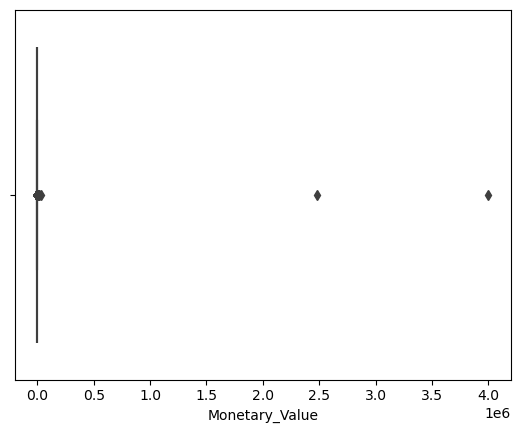

In [172]:
# Box plot
# To investigate outlier impact
sns.boxplot(x=RESULT_set["Monetary_Value"])

In [173]:
# limits indicate quantiles on left (0+0.01) and right (1-0.01=0.99)
# Determine winsorization thresholds based on training set
Q1 = RESULT_set["Monetary_Value"].quantile(0.05)  # 5th percentile
Q3 = RESULT_set["Monetary_Value"].quantile(0.95)  # 95th percentile

lower_threshold = Q1
upper_threshold = Q3
print(lower_threshold)
print(upper_threshold)

# Apply winsorization
RESULT_set["Monetary_Value"] = RESULT_set["Monetary_Value"].clip(lower_threshold, upper_threshold)

9.967000000000004
501.11049999999966


In [174]:
# limits indicate quantiles on left (0+0.01) and right (1-0.01=0.99)
# Determine winsorization thresholds based on training set

columns_to_winsorize = [
     "avg_amount", "max_amount", "min_amount", "Frequency", 
    "avg_donation_per_year", "tot_amount_3y", "avg_amount_3y", "campaign_count_3y", 'tot_amount_n','avg_amount_n','campaign_count_n','max_amount_n','min_amount_n'
]
Q1 = RESULT_set[columns_to_winsorize].quantile(0.05)  # 1th percentile
Q3 = RESULT_set[columns_to_winsorize].quantile(0.95)  # 99th percentile

lower_threshold = Q1
upper_threshold = Q3
print(lower_threshold)
print(upper_threshold)

# Apply winsorization
RESULT_set[columns_to_winsorize] = RESULT_set[columns_to_winsorize].clip(Q1, Q3,  axis=1 ) 

avg_amount               5.000
max_amount               5.000
min_amount               5.000
Frequency                1.000
avg_donation_per_year    0.080
tot_amount_3y            9.967
avg_amount_3y            5.000
campaign_count_3y        1.000
tot_amount_n             0.000
avg_amount_n             0.000
campaign_count_n         0.000
max_amount_n             0.000
min_amount_n             0.000
Name: 0.05, dtype: float64
avg_amount                55.871625
max_amount               100.000000
min_amount                49.580000
Frequency                 17.000000
avg_donation_per_year      1.420000
tot_amount_3y            501.110500
avg_amount_3y             55.871625
campaign_count_3y         17.000000
tot_amount_n              40.000000
avg_amount_n              40.000000
campaign_count_n           1.000000
max_amount_n              40.000000
min_amount_n              40.000000
Name: 0.95, dtype: float64


In [175]:
print(RESULT_set.isnull().sum())

donorID                           0
zipcode                           0
age                               0
age_group                         0
Donor_lifetime_years              0
avg_amount                        0
max_amount                        0
min_amount                        0
LOR_years                         0
Recency_years                     0
Frequency                         0
Monetary_Value                    0
avg_donation_per_year             0
tot_amount_n                      0
avg_amount_n                      0
campaign_count_n                  0
max_amount_n                      0
min_amount_n                      0
most_frequent_month               0
tot_amount_3y                     0
avg_amount_3y                     0
campaign_count_3y                 0
lettersSent                       0
CostUnit                          0
Population                        0
fl_gender_is_M                    0
fl_region_is_Flanders             0
fl_region_is_Missing        

In [176]:
RESULT_set = RESULT_set.drop(columns=['fl_province_is_Missing', 'fl_region_is_Missing',"fl_language_is_EN"])

In [177]:
print(RESULT_set.shape)
print(training_set.shape)

(26508, 43)
(34869, 47)


In [178]:
print(RESULT_set.columns)

Index(['donorID', 'zipcode', 'age', 'age_group', 'Donor_lifetime_years',
       'avg_amount', 'max_amount', 'min_amount', 'LOR_years', 'Recency_years',
       'Frequency', 'Monetary_Value', 'avg_donation_per_year', 'tot_amount_n',
       'avg_amount_n', 'campaign_count_n', 'max_amount_n', 'min_amount_n',
       'most_frequent_month', 'tot_amount_3y', 'avg_amount_3y',
       'campaign_count_3y', 'lettersSent', 'CostUnit', 'Population',
       'fl_gender_is_M', 'fl_region_is_Flanders', 'fl_region_is_Wallonia',
       'fl_language_is_NL', 'fl_province_is_Antwerp',
       'fl_province_is_Brussels', 'fl_province_is_East Flanders',
       'fl_province_is_Flemish Brabant', 'fl_province_is_Hainaut',
       'fl_province_is_Liege', 'fl_province_is_Limburg',
       'fl_province_is_Luxembourg', 'fl_province_is_Namur',
       'fl_province_is_Walloon Brabant', 'fl_province_is_West Flanders',
       'fl_Category_is_Low', 'fl_Category_is_Medium', 'is_campaign_equal'],
      dtype='object')


In [179]:
print(training_set.columns)

Index(['donorID', 'zipcode', 'age', 'age_group', 'Donor_lifetime_years',
       'avg_amount', 'max_amount', 'min_amount', 'LOR_years', 'Recency_years',
       'Frequency', 'Monetary_Value', 'avg_donation_per_year', 'tot_amount_n',
       'avg_amount_n', 'campaign_count_n', 'max_amount_n', 'min_amount_n',
       'most_frequent_month', 'tot_amount_3y', 'avg_amount_3y',
       'campaign_count_3y', 'lettersSent', 'CostUnit', 'tot_amount_dummy',
       'Population', 'fl_gender_is_M', 'fl_region_is_Flanders',
       'fl_region_is_Missing', 'fl_region_is_Wallonia', 'fl_language_is_FR',
       'fl_language_is_NL', 'fl_province_is_Antwerp',
       'fl_province_is_Brussels', 'fl_province_is_East Flanders',
       'fl_province_is_Flemish Brabant', 'fl_province_is_Hainaut',
       'fl_province_is_Liege', 'fl_province_is_Limburg',
       'fl_province_is_Luxembourg', 'fl_province_is_Missing',
       'fl_province_is_Namur', 'fl_province_is_Walloon Brabant',
       'fl_province_is_West Flanders', 'fl_

## RUN THE RESULT TEST WITH THE MODEL

In [180]:
X_result=RESULT_set
X_result

,donorID,zipcode,age,age_group,Donor_lifetime_years,avg_amount,max_amount,min_amount,LOR_years,Recency_years,...,fl_province_is_Hainaut,fl_province_is_Liege,fl_province_is_Limburg,fl_province_is_Luxembourg,fl_province_is_Namur,fl_province_is_Walloon Brabant,fl_province_is_West Flanders,fl_Category_is_Low,fl_Category_is_Medium,is_campaign_equal
0,D100001,1861.0,52,50,7.8,14.874167,30.00,6.69,15.8,8.0,...,0,0,0,0,0,0,0,0,0,0
1,D100003,1780.0,33,30,1.9,5.000000,5.00,5.00,2.4,0.5,...,0,0,0,0,0,0,0,0,0,0
2,D100004,1020.0,67,60,5.9,27.546923,49.58,24.79,14.5,8.6,...,0,0,0,0,0,0,0,0,0,0
3,D100006,1090.0,93,90,0.0,5.000000,5.00,5.00,2.4,2.4,...,0,0,0,0,0,0,0,0,0,0
4,D100009,1020.0,87,80,6.2,17.198947,25.00,7.44,14.0,7.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26503,D144687,4900.0,49,40,0.0,10.000000,10.00,10.00,4.2,4.2,...,0,1,0,0,0,0,0,1,0,0
26504,D144688,3600.0,47,40,9.4,6.937143,15.00,5.00,11.8,2.4,...,0,0,1,0,0,0,0,0,1,0
26505,D144689,3061.0,52,50,14.4,55.871625,100.00,24.79,14.4,0.1,...,0,0,0,0,0,0,0,0,0,0
26506,D144690,1950.0,43,40,0.0,40.000000,40.00,40.00,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


we run the model with the Features selected;

In [181]:
import openpyxl

selected_features = [
    'age', 'Donor_lifetime_years', 'LOR_years', 'Recency_years', 'Frequency', 
    'avg_donation_per_year', 'tot_amount_n', 'avg_amount_n', 'campaign_count_n', 
    'max_amount_n', 'min_amount_n', 'most_frequent_month', 'campaign_count_3y', 
    'lettersSent', 'fl_gender_is_M', 'fl_region_is_Wallonia', 
    'fl_province_is_Antwerp', 'fl_province_is_Luxembourg', 
    'is_campaign_equal'
]


best_gb_model = GradientBoostingClassifier(
    n_estimators=200,       
    learning_rate=0.1,      
    random_state=42
)


pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', best_gb_model)  
])


X_train_selected = X_train[selected_features]  
pipeline.fit(X_train_selected, y_train)


X_result = X_result[selected_features]  
y_result_prob = pipeline.predict_proba(X_result)[:, 1]


results = pd.DataFrame({
    'donor_id': RESULT_set['donorID'],  
    'probability': y_result_prob
})


output_file = 'donation_probabilities.xlsx'
results.to_excel(output_file, index=False, engine='openpyxl')


